In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/tweet-data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/tweet-data/tweet_data_wheel.csv
../input/tweet-data/tweet_data_tyre.csv
../input/tweet-data/tweet_data_windshield.csv
../input/tweet-data/tweet_data_carcover.csv
../input/tweet-data/tweet_data_carfreshener.csv
../input/tweet-data/tweet_data_newcar.csv
../input/tweet-data/tweet_data_lockdowncar.csv
../input/tweet-data/tweet_data_engineoil.csv
../input/tweet-data/tweet_data_newcar_old.csv


### Primarity goal and how one can implement
- https://www.linkedin.com/pulse/sentiment-analysis-demand-projection-asok-chattopadhyay
- http://cs229.stanford.edu/proj2012/ZarghamNassirpourNasiri-ElectronicDevicesSalesPredictionUsingSocialMediaSentimentAnalysis.pdf

```Intuitively, one would associate ‘positive’ sentiment with increased sales, and ‘negative’ sentiment with reduced sales volume.  But is that association real?  Even if we could agree on this intuitive expectation of directional consistency, are we able to translate levels of sentiment (positive or negative) into a quantified impact on the demand profile? For example, is it possible to establish a co-relationship between market sentiment and sales volume? Is there a causal relationship between sentiment and sales volume? Wouldn’t it be nice to be able to say, for example, that for 5% improvement in market sentiment, we would expect 7.5% uplift in sales volume?```


STEPS
- Sentiment detection (positive, neutral, negative)
- Sales Prediction

### How will we do Sales prediction
After sentiment analysis, we used a linear regression model with four features to predict the sales
of the products. We used the following four features suggested 
- total number of comments
- number of positive comments
- number of negative comments
- Sales figure based on previous data


### Refrences

- https://arxiv.org/pdf/1607.01958.pdf
- https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/analyze-tweet-sentiment-in-python/
- https://ugoproto.github.io/ugo_py_doc/sentiment_analysis_with_twitter/
- https://pythonprogramming.net/part-of-speech-tagging-nltk-tutorial/


### Cleaning tweets

In [2]:
import spacy
import re
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime

In [3]:
def load_dataset(path_csv):
    df = pd.read_csv(path_csv)  
    return df

In [4]:
def lower_casing(df):
    df['text_lower'] = df['text'].str.lower()
    return df

In [5]:
def remove_url(df):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
    df['final_text'] = df['text_lower'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
    return df

In [6]:
def idf_values(df) -> object:
    tf = TfidfVectorizer(use_idf=True)
    tf.fit_transform(df['final_text'].apply(lambda x: np.str_(x)))
    idf = tf.idf_
    feature_name = tf.get_feature_names()
    idf_df = pd.DataFrame.from_dict({'feature_name': feature_name,  'idf': idf})
    sorted_idf_info = pd.DataFrame(idf_df.sort_values('idf', ascending=False))
    return sorted_idf_info.head(20), sorted_idf_info.tail(20)

In [7]:
def sentiment_calculation(df):
    df['comment'] = df['final_text'].apply(lambda x:TextBlob(x))
    df['polarity'] = df['comment'].apply(lambda x:x.sentiment.polarity)
    df['tags'] = df['comment'].apply(lambda x:x.tags)
    df['sentiment'] = df['comment'].apply(lambda x:x.sentiment)
    return df

In [8]:
def sentiment_name(df):
    df['name_sentiment'] = df['polarity'].apply(lambda x: 'Negative' if x<0 else('Positive' if x>0  else 'Neutral'))
    return df

In [9]:
def basic_statistical_analysis(df_name):
    print("Shape info for the df =\t", df_name.shape)
    print("% of null values = \n", df_name.isnull().sum()/df_name.shape[0])
    return 0

## Wheel analysis

In [10]:
df_wheels = load_dataset("../input/tweet-data/tweet_data_wheel.csv")

In [11]:
basic_statistical_analysis(df_wheels)

Shape info for the df =	 (500, 5)
% of null values = 
 Unnamed: 0     0.0
created_at     0.0
screen_name    0.0
location       0.3
text           0.0
dtype: float64


0

In [12]:
df_wheels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   500 non-null    int64 
 1   created_at   500 non-null    object
 2   screen_name  500 non-null    object
 3   location     350 non-null    object
 4   text         500 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.7+ KB


In [13]:
df_wheels['created_at'] = pd.to_datetime(df_wheels['created_at'], format='%Y-%m-%d %H:%M:%S' )

In [14]:
df_wheels.head()

,Unnamed: 0,created_at,screen_name,location,text
0,0,2021-05-25 15:23:55,INTOZJY,NaN,@laohuxiaoxiong i think the fandom name is car...
1,1,2021-05-25 15:22:11,thayer_a,"Los Angeles, CA",@UNFCCC I have some ideas to slow or reverse c...
2,2,2021-05-25 15:20:54,zeke1335,NaN,RT @SheaSerrano: LARAMI’S LITTLE COUSIN WAS ON...
3,3,2021-05-25 15:18:46,hottboyyggm,"Charlotte, NC","It's the maybach drive itself for me, I bet no..."
4,4,2021-05-25 15:16:48,cgk205,"West Virginia, USA",RT @SheaSerrano: LARAMI’S LITTLE COUSIN WAS ON...


In [15]:
lower_casing(df_wheels).text_lower.head()

0    @laohuxiaoxiong i think the fandom name is car...
1    @unfccc i have some ideas to slow or reverse c...
2    rt @sheaserrano: larami’s little cousin was on...
3    it's the maybach drive itself for me, i bet no...
4    rt @sheaserrano: larami’s little cousin was on...
Name: text_lower, dtype: object

In [16]:
remove_url(df_wheels).final_text.head()

0    @laohuxiaoxiong i think the fandom name is car...
1    @unfccc i have some ideas to slow or reverse c...
2    rt @sheaserrano: larami’s little cousin was on...
3    it's the maybach drive itself for me, i bet no...
4    rt @sheaserrano: larami’s little cousin was on...
Name: final_text, dtype: object

In [17]:
idf_values(df_wheels)

(         feature_name       idf
 1023            leans  6.523459
 1205           nathan  6.523459
 1203           nascar  6.523459
 1201            naira  6.523459
 1200             nahi  6.523459
 1199              nah  6.523459
 1197           myself  6.523459
 1196              mys  6.523459
 1195        mycarguru  6.523459
 1193             must  6.523459
 1192             musk  6.523459
 1191            music  6.523459
 1190         murdered  6.523459
 1189  multiplicityand  6.523459
 1188         multiple  6.523459
 1185        mtgreenee  6.523459
 1184       mrroryreid  6.523459
 1183          mpsrtpc  6.523459
 1182              mph  6.523459
 1180        movements  6.523459,
      feature_name       idf
 292        bottas  3.139069
 1701        still  3.122262
 1767         that  3.105732
 1194           my  3.089472
 699           for  3.089472
 761           got  3.089472
 813            he  2.859897
 935            it  2.785789
 1931          was  2.773955
 1785         th

### Polarity calculation for tweets

### POS tag list:

* CC	coordinating conjunction
* CD	cardinal digit
* DT	determiner
* EX	existential there (like: "there is" ... think of it like "there exists")
* FW	foreign word
* IN	preposition/subordinating conjunction
* JJ	adjective	'big'
* JJR	adjective, comparative	'bigger'
* JJS	adjective, superlative	'biggest'
* LS	list marker	1)
* MD	modal	could, will
* NN	noun, singular 'desk'
* NNS	noun plural	'desks'
* NNP	proper noun, singular	'Harrison'
* NNPS	proper noun, plural	'Americans'
* PDT	predeterminer	'all the kids'
* POS	possessive ending	parent\'s
* PRP	personal pronoun	I, he, she
* PRP$	possessive pronoun	my, his, hers
* RB	adverb	very, silently,
* RBR	adverb, comparative	better
* RBS	adverb, superlative	best
* RP	particle	give up
* TO	to	go 'to' the store.
* UH	interjection	errrrrrrrm
* VB	verb, base form	take
* VBD	verb, past tense	took
* VBG	verb, gerund/present participle	taking
* VBN	verb, past participle	taken
* VBP	verb, sing. present, non-3d	take
* VBZ	verb, 3rd person sing. present	takes
* WDT	wh-determiner	which
* WP	wh-pronoun	who, what
* WP$	possessive wh-pronoun	whose
* WRB	wh-abverb	where, when

In [18]:
sentiment_calculation(df_wheels).head()

,Unnamed: 0,created_at,screen_name,location,text,text_lower,final_text,comment,polarity,tags,sentiment
0,0,2021-05-25 15:23:55,INTOZJY,NaN,@laohuxiaoxiong i think the fandom name is car...,@laohuxiaoxiong i think the fandom name is car...,@laohuxiaoxiong i think the fandom name is car...,"(@, l, a, o, h, u, x, i, a, o, x, i, o, n, g, ...",0.000000,"[(@, NN), (laohuxiaoxiong, NN), (i, NN), (thin...","(0.0, 0.0)"
1,1,2021-05-25 15:22:11,thayer_a,"Los Angeles, CA",@UNFCCC I have some ideas to slow or reverse c...,@unfccc i have some ideas to slow or reverse c...,@unfccc i have some ideas to slow or reverse c...,"(@, u, n, f, c, c, c, , i, , h, a, v, e, , ...",0.033333,"[(@, JJ), (unfccc, NN), (i, NN), (have, VBP), ...","(0.033333333333333326, 0.55)"
2,2,2021-05-25 15:20:54,zeke1335,NaN,RT @SheaSerrano: LARAMI’S LITTLE COUSIN WAS ON...,rt @sheaserrano: larami’s little cousin was on...,rt @sheaserrano: larami’s little cousin was on...,"(r, t, , @, s, h, e, a, s, e, r, r, a, n, o, ...",-0.195833,"[(rt, NN), (@, JJ), (sheaserrano, NN), (larami...","(-0.1958333333333333, 0.5666666666666668)"
3,3,2021-05-25 15:18:46,hottboyyggm,"Charlotte, NC","It's the maybach drive itself for me, I bet no...","it's the maybach drive itself for me, i bet no...","it's the maybach drive itself for me, i bet no...","(i, t, ', s, , t, h, e, , m, a, y, b, a, c, ...",0.000000,"[(it, PRP), ('s, VBZ), (the, DT), (maybach, NN...","(0.0, 0.0)"
4,4,2021-05-25 15:16:48,cgk205,"West Virginia, USA",RT @SheaSerrano: LARAMI’S LITTLE COUSIN WAS ON...,rt @sheaserrano: larami’s little cousin was on...,rt @sheaserrano: larami’s little cousin was on...,"(r, t, , @, s, h, e, a, s, e, r, r, a, n, o, ...",-0.195833,"[(rt, NN), (@, JJ), (sheaserrano, NN), (larami...","(-0.1958333333333333, 0.5666666666666668)"


In [19]:
df_wheels.loc[df_wheels['polarity']==0].head()

,Unnamed: 0,created_at,screen_name,location,text,text_lower,final_text,comment,polarity,tags,sentiment
0,0,2021-05-25 15:23:55,INTOZJY,NaN,@laohuxiaoxiong i think the fandom name is car...,@laohuxiaoxiong i think the fandom name is car...,@laohuxiaoxiong i think the fandom name is car...,"(@, l, a, o, h, u, x, i, a, o, x, i, o, n, g, ...",0.0,"[(@, NN), (laohuxiaoxiong, NN), (i, NN), (thin...","(0.0, 0.0)"
3,3,2021-05-25 15:18:46,hottboyyggm,"Charlotte, NC","It's the maybach drive itself for me, I bet no...","it's the maybach drive itself for me, i bet no...","it's the maybach drive itself for me, i bet no...","(i, t, ', s, , t, h, e, , m, a, y, b, a, c, ...",0.0,"[(it, PRP), ('s, VBZ), (the, DT), (maybach, NN...","(0.0, 0.0)"
6,6,2021-05-25 15:08:15,tedgar789,"Dallas, TX",I’ve been seeing a lot of y’all put y’all’s ca...,i’ve been seeing a lot of y’all put y’all’s ca...,i’ve been seeing a lot of y’all put y’all’s ca...,"(i, ’, v, e, , b, e, e, n, , s, e, e, i, n, ...",0.0,"[(i, NN), (’, VBP), (ve, RB), (been, VBN), (se...","(0.0, 0.0)"
8,8,2021-05-25 15:04:42,stillcorrectz,"Navi Mumbai, India",The fact that the wheel is STILL stuck on Valt...,the fact that the wheel is still stuck on valt...,the fact that the wheel is still stuck on valt...,"(t, h, e, , f, a, c, t, , t, h, a, t, , t, ...",0.0,"[(the, DT), (fact, NN), (that, IN), (the, DT),...","(0.0, 0.0)"
10,10,2021-05-25 15:03:13,TheGentlestThug,"Chicago, IL",@waffles1370 @SwagScot @Jamesmiltonray @thefra...,@waffles1370 @swagscot @jamesmiltonray @thefra...,@waffles1370 @swagscot @jamesmiltonray @thefra...,"(@, w, a, f, f, l, e, s, 1, 3, 7, 0, , @, s, ...",0.0,"[(@, JJ), (waffles1370, NN), (@, NNP), (swagsc...","(0.0, 0.0)"


In [20]:
sentiment_name(df_wheels).head()

,Unnamed: 0,created_at,screen_name,location,text,text_lower,final_text,comment,polarity,tags,sentiment,name_sentiment
0,0,2021-05-25 15:23:55,INTOZJY,NaN,@laohuxiaoxiong i think the fandom name is car...,@laohuxiaoxiong i think the fandom name is car...,@laohuxiaoxiong i think the fandom name is car...,"(@, l, a, o, h, u, x, i, a, o, x, i, o, n, g, ...",0.000000,"[(@, NN), (laohuxiaoxiong, NN), (i, NN), (thin...","(0.0, 0.0)",Neutral
1,1,2021-05-25 15:22:11,thayer_a,"Los Angeles, CA",@UNFCCC I have some ideas to slow or reverse c...,@unfccc i have some ideas to slow or reverse c...,@unfccc i have some ideas to slow or reverse c...,"(@, u, n, f, c, c, c, , i, , h, a, v, e, , ...",0.033333,"[(@, JJ), (unfccc, NN), (i, NN), (have, VBP), ...","(0.033333333333333326, 0.55)",Positive
2,2,2021-05-25 15:20:54,zeke1335,NaN,RT @SheaSerrano: LARAMI’S LITTLE COUSIN WAS ON...,rt @sheaserrano: larami’s little cousin was on...,rt @sheaserrano: larami’s little cousin was on...,"(r, t, , @, s, h, e, a, s, e, r, r, a, n, o, ...",-0.195833,"[(rt, NN), (@, JJ), (sheaserrano, NN), (larami...","(-0.1958333333333333, 0.5666666666666668)",Negative
3,3,2021-05-25 15:18:46,hottboyyggm,"Charlotte, NC","It's the maybach drive itself for me, I bet no...","it's the maybach drive itself for me, i bet no...","it's the maybach drive itself for me, i bet no...","(i, t, ', s, , t, h, e, , m, a, y, b, a, c, ...",0.000000,"[(it, PRP), ('s, VBZ), (the, DT), (maybach, NN...","(0.0, 0.0)",Neutral
4,4,2021-05-25 15:16:48,cgk205,"West Virginia, USA",RT @SheaSerrano: LARAMI’S LITTLE COUSIN WAS ON...,rt @sheaserrano: larami’s little cousin was on...,rt @sheaserrano: larami’s little cousin was on...,"(r, t, , @, s, h, e, a, s, e, r, r, a, n, o, ...",-0.195833,"[(rt, NN), (@, JJ), (sheaserrano, NN), (larami...","(-0.1958333333333333, 0.5666666666666668)",Negative


### Visualizing the count of sentiments

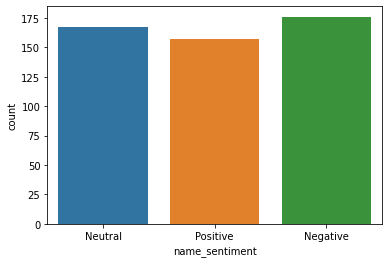

In [21]:
ax = sns.countplot(x="name_sentiment", data=df_wheels)

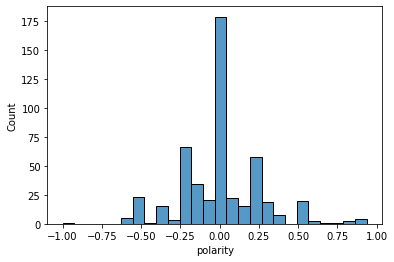

In [22]:
ab = sns.histplot(x="polarity", data=df_wheels)

<AxesSubplot:xlabel='polarity', ylabel='created_at'>

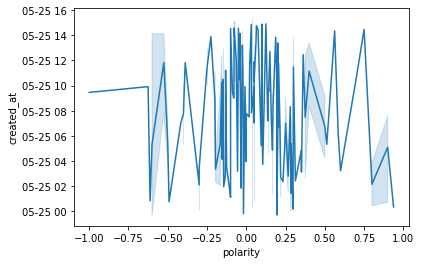

In [23]:
sns.lineplot(y="created_at", x="polarity", data=df_wheels)

# Windsheild analysis

In [24]:
df_windshield = load_dataset("../input/tweet-data/tweet_data_windshield.csv")

In [25]:
df_windshield.dtypes

Unnamed: 0      int64
created_at     object
screen_name    object
location       object
text           object
dtype: object

In [26]:
df_windshield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   500 non-null    int64 
 1   created_at   500 non-null    object
 2   screen_name  500 non-null    object
 3   location     340 non-null    object
 4   text         500 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.7+ KB


In [27]:
basic_statistical_analysis(df_windshield)

Shape info for the df =	 (500, 5)
% of null values = 
 Unnamed: 0     0.00
created_at     0.00
screen_name    0.00
location       0.32
text           0.00
dtype: float64


0

In [28]:
df_windshield['created_at'] = pd.to_datetime(df_windshield['created_at'], format='%Y-%m-%d %H:%M:%S' )

In [29]:
df_windshield.info() #converted to datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   500 non-null    int64         
 1   created_at   500 non-null    datetime64[ns]
 2   screen_name  500 non-null    object        
 3   location     340 non-null    object        
 4   text         500 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 19.7+ KB


In [30]:
lower_casing(df_windshield).text_lower.head()

0    use an actual glass cleaner on your car’s mirr...
1    rt @thepressofac: bridgeton — police are inves...
2    [alt text: video of rain pounding loudly on th...
3    bridgeton — police are investigating an appare...
4    @tinytweeter00 i cannot stand living in florid...
Name: text_lower, dtype: object

In [31]:
remove_url(df_windshield).final_text.head()

0    use an actual glass cleaner on your car’s mirr...
1    rt @thepressofac: bridgeton — police are inves...
2    [alt text: video of rain pounding loudly on th...
3    bridgeton — police are investigating an appare...
4    @tinytweeter00 i cannot stand living in florid...
Name: final_text, dtype: object

In [32]:
idf_values(df_windshield)

(     feature_name       idf
 0              03  6.523459
 1143         nite  6.523459
 1175          ole  6.523459
 1174        older  6.523459
 1169           oi  6.523459
 1166        often  6.523459
 1163       office  6.523459
 1156     obstruct  6.523459
 1155     obituary  6.523459
 1153     nutshell  6.523459
 1145         none  6.523459
 1141    nickrallo  6.523459
 1046         masc  6.523459
 1140           ni  6.523459
 1139          nhl  6.523459
 1138         next  6.523459
 1134      nervous  6.523459
 1133     neighbor  6.523459
 1132          nei  6.523459
 1129         neck  6.523459,
      feature_name       idf
 1210      parking  3.246314
 139            at  3.246314
 1013          lot  3.227622
 819          hood  3.227622
 1708         that  3.073471
 1563           so  3.073471
 1954         with  3.042219
 1888          was  2.953926
 880            is  2.926147
 884            it  2.847158
 1160           of  2.534475
 855            in  2.525258
 1754        

In [33]:
sentiment_calculation(df_windshield).head()

,Unnamed: 0,created_at,screen_name,location,text,text_lower,final_text,comment,polarity,tags,sentiment
0,0,2021-05-25 16:00:03,AffordAutoGlass,"Houston, Texas",Use an actual glass cleaner on your car’s mirr...,use an actual glass cleaner on your car’s mirr...,use an actual glass cleaner on your car’s mirr...,"(u, s, e, , a, n, , a, c, t, u, a, l, , g, ...",0.000,"[(use, IN), (an, DT), (actual, JJ), (glass, NN...","(0.0, 0.1)"
1,1,2021-05-25 15:56:11,PhillyHomicides,Southeastern PA,RT @ThePressofAC: BRIDGETON — Police are inves...,rt @thepressofac: bridgeton — police are inves...,rt @thepressofac: bridgeton — police are inves...,"(r, t, , @, t, h, e, p, r, e, s, s, o, f, a, ...",0.025,"[(rt, NN), (@, NN), (thepressofac, NN), (bridg...","(0.025, 0.175)"
2,2,2021-05-25 15:51:55,laura_hirsb,NaN,[alt text: video of rain pounding loudly on th...,[alt text: video of rain pounding loudly on th...,[alt text: video of rain pounding loudly on th...,"([, a, l, t, , t, e, x, t, :, , v, i, d, e, ...",0.100,"[([, JJ), (alt, NN), (text, NN), (video, NN), ...","(0.1, 0.8)"
3,3,2021-05-25 15:47:11,ThePressofAC,"Atlantic City, New Jersey",BRIDGETON — Police are investigating an appare...,bridgeton — police are investigating an appare...,bridgeton — police are investigating an appare...,"(b, r, i, d, g, e, t, o, n, , —, , p, o, l, ...",0.025,"[(bridgeton, NN), (—, NNP), (police, NNS), (ar...","(0.025, 0.175)"
4,4,2021-05-25 15:40:59,iRollMyRsMa,"Kissimmee, FL",@TinyTweeter00 I cannot stand living in Florid...,@tinytweeter00 i cannot stand living in florid...,@tinytweeter00 i cannot stand living in florid...,"(@, t, i, n, y, t, w, e, e, t, e, r, 0, 0, , ...",0.000,"[(@, JJ), (tinytweeter00, NN), (i, NN), (can, ...","(0.0, 0.0)"


In [34]:
sentiment_name(df_windshield).head()

,Unnamed: 0,created_at,screen_name,location,text,text_lower,final_text,comment,polarity,tags,sentiment,name_sentiment
0,0,2021-05-25 16:00:03,AffordAutoGlass,"Houston, Texas",Use an actual glass cleaner on your car’s mirr...,use an actual glass cleaner on your car’s mirr...,use an actual glass cleaner on your car’s mirr...,"(u, s, e, , a, n, , a, c, t, u, a, l, , g, ...",0.000,"[(use, IN), (an, DT), (actual, JJ), (glass, NN...","(0.0, 0.1)",Neutral
1,1,2021-05-25 15:56:11,PhillyHomicides,Southeastern PA,RT @ThePressofAC: BRIDGETON — Police are inves...,rt @thepressofac: bridgeton — police are inves...,rt @thepressofac: bridgeton — police are inves...,"(r, t, , @, t, h, e, p, r, e, s, s, o, f, a, ...",0.025,"[(rt, NN), (@, NN), (thepressofac, NN), (bridg...","(0.025, 0.175)",Positive
2,2,2021-05-25 15:51:55,laura_hirsb,NaN,[alt text: video of rain pounding loudly on th...,[alt text: video of rain pounding loudly on th...,[alt text: video of rain pounding loudly on th...,"([, a, l, t, , t, e, x, t, :, , v, i, d, e, ...",0.100,"[([, JJ), (alt, NN), (text, NN), (video, NN), ...","(0.1, 0.8)",Positive
3,3,2021-05-25 15:47:11,ThePressofAC,"Atlantic City, New Jersey",BRIDGETON — Police are investigating an appare...,bridgeton — police are investigating an appare...,bridgeton — police are investigating an appare...,"(b, r, i, d, g, e, t, o, n, , —, , p, o, l, ...",0.025,"[(bridgeton, NN), (—, NNP), (police, NNS), (ar...","(0.025, 0.175)",Positive
4,4,2021-05-25 15:40:59,iRollMyRsMa,"Kissimmee, FL",@TinyTweeter00 I cannot stand living in Florid...,@tinytweeter00 i cannot stand living in florid...,@tinytweeter00 i cannot stand living in florid...,"(@, t, i, n, y, t, w, e, e, t, e, r, 0, 0, , ...",0.000,"[(@, JJ), (tinytweeter00, NN), (i, NN), (can, ...","(0.0, 0.0)",Neutral


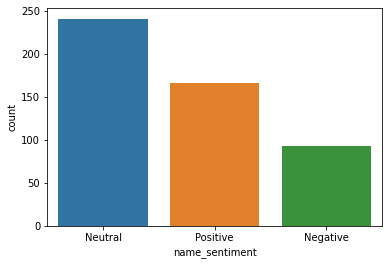

In [35]:
ax = sns.countplot(x="name_sentiment", data=df_windshield)

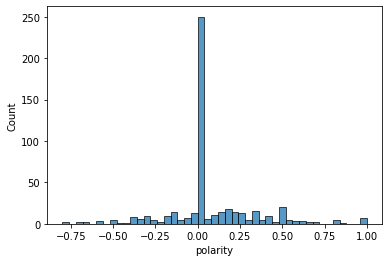

In [36]:
ab = sns.histplot(x="polarity", data=df_windshield)

<AxesSubplot:xlabel='polarity', ylabel='created_at'>

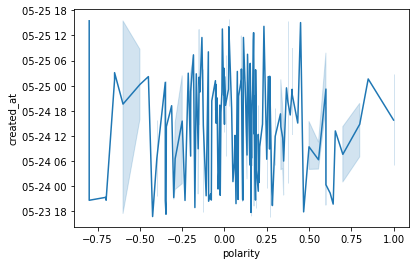

In [37]:
sns.lineplot(y="created_at", x="polarity", data=df_windshield)

# carcover analysis

In [38]:
df_carcover = load_dataset("../input/tweet-data/tweet_data_carcover.csv")

In [39]:
df_carcover.dtypes

Unnamed: 0      int64
created_at     object
screen_name    object
location       object
text           object
dtype: object

In [40]:
df_carcover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   500 non-null    int64 
 1   created_at   500 non-null    object
 2   screen_name  500 non-null    object
 3   location     352 non-null    object
 4   text         500 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.7+ KB


In [41]:
basic_statistical_analysis(df_carcover)

Shape info for the df =	 (500, 5)
% of null values = 
 Unnamed: 0     0.000
created_at     0.000
screen_name    0.000
location       0.296
text           0.000
dtype: float64


0

In [42]:
df_carcover['created_at'] = pd.to_datetime(df_carcover['created_at'], format='%Y-%m-%d %H:%M:%S' )

In [43]:
df_carcover.info() #converted to datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   500 non-null    int64         
 1   created_at   500 non-null    datetime64[ns]
 2   screen_name  500 non-null    object        
 3   location     352 non-null    object        
 4   text         500 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 19.7+ KB


In [44]:
lower_casing(df_carcover).text_lower.head()

0    @michael1979, here’s a neat tech tip! i’ve bee...
1    oh no,an actual reporter has bought  @transalt...
2    wtf did the wolf in pulp fiction do that was s...
3    rt @947: let @miwayinsurance cover your insura...
4    #dyk : that if your car is damaged in a disast...
Name: text_lower, dtype: object

In [45]:
remove_url(df_carcover).final_text.head()

0    @michael1979, here’s a neat tech tip! i’ve bee...
1    oh no,an actual reporter has bought  @transalt...
2    wtf did the wolf in pulp fiction do that was s...
3    rt @947: let @miwayinsurance cover your insura...
4    #dyk : that if your car is damaged in a disast...
Name: final_text, dtype: object

In [46]:
idf_values(df_carcover)

(     feature_name       idf
 2202           zz  6.523459
 925          haha  6.523459
 1691        scott  6.523459
 933      happened  6.523459
 932       hanging  6.523459
 1692      scratch  6.523459
 930       handful  6.523459
 1693    scratched  6.523459
 927        hammer  6.523459
 926     halloween  6.523459
 1695    screwdriv  6.523459
 913        ground  6.523459
 1698       seater  6.523459
 921          guys  6.523459
 1699        seats  6.523459
 919     gutprayer  6.523459
 918         guild  6.523459
 917         guess  6.523459
 1701      seconds  6.523459
 915           gta  6.523459,
      feature_name       idf
 1046    insurance  3.324786
 1921         that  3.209273
 2197         your  3.173555
 1404           on  3.122262
 2097          was  3.057723
 1059           is  2.953926
 1063           it  2.872801
 1391           of  2.834579
 1342           my  2.822157
 1697         seat  2.809887
 371            by  2.785789
 1029           in  2.705747
 2195        

In [47]:
sentiment_calculation(df_carcover).head()

,Unnamed: 0,created_at,screen_name,location,text,text_lower,final_text,comment,polarity,tags,sentiment
0,0,2021-05-25 15:42:21,moshe_classtars,NaN,"@Michael1979, here’s a neat tech tip! I’ve bee...","@michael1979, here’s a neat tech tip! i’ve bee...","@michael1979, here’s a neat tech tip! i’ve bee...","(@, m, i, c, h, a, e, l, 1, 9, 7, 9, ,, , h, ...",0.000000,"[(@, NN), (michael1979, NN), (here, RB), (’, V...","(0.0, 0.0)"
1,1,2021-05-25 15:41:52,Lowlifecrusher,The Ave.,"Oh no,an actual reporter has bought @TransAlt...","oh no,an actual reporter has bought @transalt...","oh no,an actual reporter has bought @transalt...","(o, h, , n, o, ,, a, n, , a, c, t, u, a, l, ...",0.000000,"[(oh, UH), (no, DT), (an, DT), (actual, JJ), (...","(0.0, 0.1)"
2,2,2021-05-25 15:38:59,MichaelkParsons,Lexington,WTF did the Wolf in Pulp Fiction do that was s...,wtf did the wolf in pulp fiction do that was s...,wtf did the wolf in pulp fiction do that was s...,"(w, t, f, , d, i, d, , t, h, e, , w, o, l, ...",0.288889,"[(wtf, NN), (did, VBD), (the, DT), (wolf, NN),...","(0.2888888888888889, 0.9)"
3,3,2021-05-25 15:33:45,golfballfinder1,NaN,RT @947: Let @miwayinsurance cover your insura...,rt @947: let @miwayinsurance cover your insura...,rt @947: let @miwayinsurance cover your insura...,"(r, t, , @, 9, 4, 7, :, , l, e, t, , @, m, ...",0.175000,"[(rt, NN), (@, VBZ), (947, CD), (let, NN), (@,...","(0.175, 0.44999999999999996)"
4,4,2021-05-25 15:30:00,nevadadoi,"Carson City, Nev.",#DYK : that if your car is damaged in a disast...,#dyk : that if your car is damaged in a disast...,#dyk : that if your car is damaged in a disast...,"(#, d, y, k, , :, , t, h, a, t, , i, f, , ...",0.000000,"[(dyk, NN), (that, IN), (if, IN), (your, PRP$)...","(0.0, 0.0)"


In [48]:
sentiment_name(df_carcover).head()

,Unnamed: 0,created_at,screen_name,location,text,text_lower,final_text,comment,polarity,tags,sentiment,name_sentiment
0,0,2021-05-25 15:42:21,moshe_classtars,NaN,"@Michael1979, here’s a neat tech tip! I’ve bee...","@michael1979, here’s a neat tech tip! i’ve bee...","@michael1979, here’s a neat tech tip! i’ve bee...","(@, m, i, c, h, a, e, l, 1, 9, 7, 9, ,, , h, ...",0.000000,"[(@, NN), (michael1979, NN), (here, RB), (’, V...","(0.0, 0.0)",Neutral
1,1,2021-05-25 15:41:52,Lowlifecrusher,The Ave.,"Oh no,an actual reporter has bought @TransAlt...","oh no,an actual reporter has bought @transalt...","oh no,an actual reporter has bought @transalt...","(o, h, , n, o, ,, a, n, , a, c, t, u, a, l, ...",0.000000,"[(oh, UH), (no, DT), (an, DT), (actual, JJ), (...","(0.0, 0.1)",Neutral
2,2,2021-05-25 15:38:59,MichaelkParsons,Lexington,WTF did the Wolf in Pulp Fiction do that was s...,wtf did the wolf in pulp fiction do that was s...,wtf did the wolf in pulp fiction do that was s...,"(w, t, f, , d, i, d, , t, h, e, , w, o, l, ...",0.288889,"[(wtf, NN), (did, VBD), (the, DT), (wolf, NN),...","(0.2888888888888889, 0.9)",Positive
3,3,2021-05-25 15:33:45,golfballfinder1,NaN,RT @947: Let @miwayinsurance cover your insura...,rt @947: let @miwayinsurance cover your insura...,rt @947: let @miwayinsurance cover your insura...,"(r, t, , @, 9, 4, 7, :, , l, e, t, , @, m, ...",0.175000,"[(rt, NN), (@, VBZ), (947, CD), (let, NN), (@,...","(0.175, 0.44999999999999996)",Positive
4,4,2021-05-25 15:30:00,nevadadoi,"Carson City, Nev.",#DYK : that if your car is damaged in a disast...,#dyk : that if your car is damaged in a disast...,#dyk : that if your car is damaged in a disast...,"(#, d, y, k, , :, , t, h, a, t, , i, f, , ...",0.000000,"[(dyk, NN), (that, IN), (if, IN), (your, PRP$)...","(0.0, 0.0)",Neutral


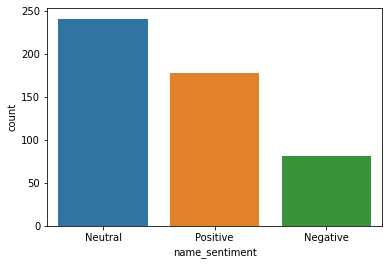

In [49]:
ax = sns.countplot(x="name_sentiment", data=df_carcover)

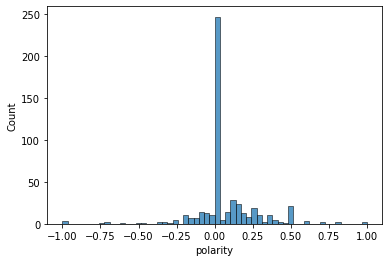

In [50]:
ab = sns.histplot(x="polarity", data=df_carcover)

<AxesSubplot:xlabel='polarity', ylabel='created_at'>

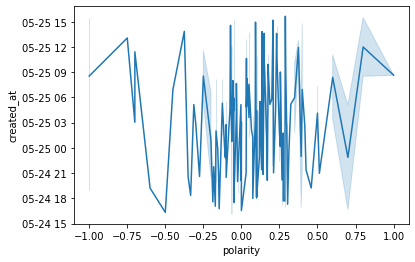

In [51]:
sns.lineplot(y='created_at', x="polarity", data=df_carcover)

# Carfreshner analysis

In [52]:
df_carfreshner = load_dataset("../input/tweet-data/tweet_data_carfreshener.csv")

In [53]:
df_carfreshner.dtypes

Unnamed: 0      int64
created_at     object
screen_name    object
location       object
text           object
dtype: object

In [54]:
df_carfreshner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   500 non-null    int64 
 1   created_at   500 non-null    object
 2   screen_name  500 non-null    object
 3   location     303 non-null    object
 4   text         500 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.7+ KB


In [55]:
basic_statistical_analysis(df_carfreshner)

Shape info for the df =	 (500, 5)
% of null values = 
 Unnamed: 0     0.000
created_at     0.000
screen_name    0.000
location       0.394
text           0.000
dtype: float64


0

In [56]:
df_carfreshner['created_at'] = pd.to_datetime(df_carfreshner['created_at'], format='%Y-%m-%d %H:%M:%S' )

In [57]:
df_carfreshner.info() #converted to datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   500 non-null    int64         
 1   created_at   500 non-null    datetime64[ns]
 2   screen_name  500 non-null    object        
 3   location     303 non-null    object        
 4   text         500 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 19.7+ KB


In [58]:
lower_casing(df_carfreshner).text_lower.head()

0    retro player car air freshener\n$ 33.00 and fr...
1    rt @gastationbarbie: people who use the black ...
2    people who use the black ice car air freshener...
3    i bought new deodorant and it makes me smell l...
4    i went to the store to buy an air freshener fo...
Name: text_lower, dtype: object

In [59]:
remove_url(df_carfreshner).final_text.head()

0    retro player car air freshener\n$ 33.00 and fr...
1    rt @gastationbarbie: people who use the black ...
2    people who use the black ice car air freshener...
3    i bought new deodorant and it makes me smell l...
4    i went to the store to buy an air freshener fo...
Name: final_text, dtype: object

In [60]:
idf_values(df_carfreshner)

(         feature_name       idf
 1554          youtube  6.523459
 842                ma  6.523459
 1451             wake  6.523459
 853        mamasgeeky  6.523459
 852              mall  6.523459
 847          magnetic  6.523459
 845           madonna  6.523459
 1452          waldorf  6.523459
 841              lynx  6.523459
 856            manips  6.523459
 840             lying  6.523459
 837              lush  6.523459
 835               low  6.523459
 834        lovesukkle  6.523459
 833             loved  6.523459
 1454           walked  6.523459
 855        manchester  6.523459
 857       manmademoon  6.523459
 1455          walking  6.523459
 872   mechanicbritish  6.523459,
      feature_name       idf
 1157         same  3.139069
 1351         they  3.105732
 168          best  3.105732
 547           for  3.105732
 65            all  3.089472
 81            amp  3.042219
 733            is  3.026951
 735            it  2.997098
 114            at  2.953926
 1378           

In [61]:
sentiment_calculation(df_carfreshner).head()

,Unnamed: 0,created_at,screen_name,location,text,text_lower,final_text,comment,polarity,tags,sentiment
0,0,2021-05-25 15:52:49,WheelExcellent,NaN,Retro Player Car Air Freshener\n$ 33.00 and FR...,retro player car air freshener\n$ 33.00 and fr...,retro player car air freshener\n$ 33.00 and fr...,"(r, e, t, r, o, , p, l, a, y, e, r, , c, a, ...",0.400000,"[(retro, NN), (player, NN), (car, NN), (air, N...","(0.4, 0.8)"
1,1,2021-05-25 15:32:02,catholicdavidb,NaN,RT @gastationbarbie: people who use the black ...,rt @gastationbarbie: people who use the black ...,rt @gastationbarbie: people who use the black ...,"(r, t, , @, g, a, s, t, a, t, i, o, n, b, a, ...",-0.166667,"[(rt, NN), (@, VBZ), (gastationbarbie, NN), (p...","(-0.16666666666666666, 0.43333333333333335)"
2,2,2021-05-25 15:27:39,gastationbarbie,20 she/her ☭,people who use the black ice car air freshener...,people who use the black ice car air freshener...,people who use the black ice car air freshener...,"(p, e, o, p, l, e, , w, h, o, , u, s, e, , ...",-0.166667,"[(people, NNS), (who, WP), (use, VBP), (the, D...","(-0.16666666666666666, 0.43333333333333335)"
3,3,2021-05-25 15:13:21,ohnoohjeez,United States,I bought new deodorant and it makes me smell l...,i bought new deodorant and it makes me smell l...,i bought new deodorant and it makes me smell l...,"(i, , b, o, u, g, h, t, , n, e, w, , d, e, ...",0.118182,"[(i, NNS), (bought, VBD), (new, JJ), (deodoran...","(0.11818181818181818, 0.32727272727272727)"
4,4,2021-05-25 15:03:44,OedipaB,NaN,I went to the store to buy an air freshener fo...,i went to the store to buy an air freshener fo...,i went to the store to buy an air freshener fo...,"(i, , w, e, n, t, , t, o, , t, h, e, , s, ...",0.500000,"[(i, JJ), (went, VBD), (to, TO), (the, DT), (s...","(0.5, 0.5)"


In [62]:
sentiment_name(df_carfreshner).head()

,Unnamed: 0,created_at,screen_name,location,text,text_lower,final_text,comment,polarity,tags,sentiment,name_sentiment
0,0,2021-05-25 15:52:49,WheelExcellent,NaN,Retro Player Car Air Freshener\n$ 33.00 and FR...,retro player car air freshener\n$ 33.00 and fr...,retro player car air freshener\n$ 33.00 and fr...,"(r, e, t, r, o, , p, l, a, y, e, r, , c, a, ...",0.400000,"[(retro, NN), (player, NN), (car, NN), (air, N...","(0.4, 0.8)",Positive
1,1,2021-05-25 15:32:02,catholicdavidb,NaN,RT @gastationbarbie: people who use the black ...,rt @gastationbarbie: people who use the black ...,rt @gastationbarbie: people who use the black ...,"(r, t, , @, g, a, s, t, a, t, i, o, n, b, a, ...",-0.166667,"[(rt, NN), (@, VBZ), (gastationbarbie, NN), (p...","(-0.16666666666666666, 0.43333333333333335)",Negative
2,2,2021-05-25 15:27:39,gastationbarbie,20 she/her ☭,people who use the black ice car air freshener...,people who use the black ice car air freshener...,people who use the black ice car air freshener...,"(p, e, o, p, l, e, , w, h, o, , u, s, e, , ...",-0.166667,"[(people, NNS), (who, WP), (use, VBP), (the, D...","(-0.16666666666666666, 0.43333333333333335)",Negative
3,3,2021-05-25 15:13:21,ohnoohjeez,United States,I bought new deodorant and it makes me smell l...,i bought new deodorant and it makes me smell l...,i bought new deodorant and it makes me smell l...,"(i, , b, o, u, g, h, t, , n, e, w, , d, e, ...",0.118182,"[(i, NNS), (bought, VBD), (new, JJ), (deodoran...","(0.11818181818181818, 0.32727272727272727)",Positive
4,4,2021-05-25 15:03:44,OedipaB,NaN,I went to the store to buy an air freshener fo...,i went to the store to buy an air freshener fo...,i went to the store to buy an air freshener fo...,"(i, , w, e, n, t, , t, o, , t, h, e, , s, ...",0.500000,"[(i, JJ), (went, VBD), (to, TO), (the, DT), (s...","(0.5, 0.5)",Positive


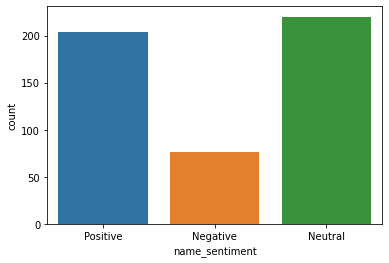

In [63]:
ax = sns.countplot(x="name_sentiment", data=df_carfreshner)

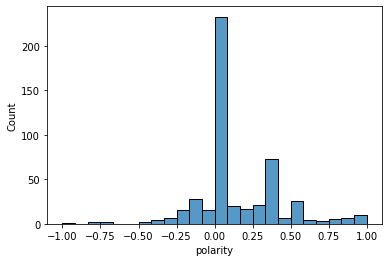

In [64]:
ab = sns.histplot(x="polarity", data=df_carfreshner)

<AxesSubplot:xlabel='polarity', ylabel='created_at'>

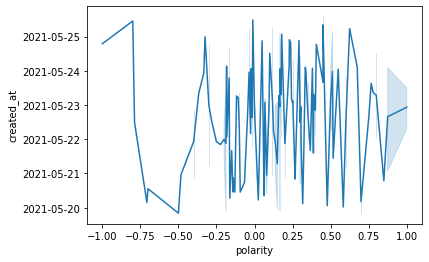

In [65]:
sns.lineplot(y="created_at", x="polarity", data=df_carfreshner)

# Engineoil analysis

In [66]:
df_engineoil = load_dataset("../input/tweet-data/tweet_data_engineoil.csv")

In [67]:
df_engineoil.dtypes

Unnamed: 0      int64
created_at     object
screen_name    object
location       object
text           object
dtype: object

In [68]:
df_engineoil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   500 non-null    int64 
 1   created_at   500 non-null    object
 2   screen_name  500 non-null    object
 3   location     333 non-null    object
 4   text         500 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.7+ KB


In [69]:
basic_statistical_analysis(df_engineoil)

Shape info for the df =	 (500, 5)
% of null values = 
 Unnamed: 0     0.000
created_at     0.000
screen_name    0.000
location       0.334
text           0.000
dtype: float64


0

In [70]:
df_engineoil['created_at'] = pd.to_datetime(df_engineoil['created_at'], format='%Y-%m-%d %H:%M:%S' )

In [71]:
df_engineoil.info() #converted to datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   500 non-null    int64         
 1   created_at   500 non-null    datetime64[ns]
 2   screen_name  500 non-null    object        
 3   location     333 non-null    object        
 4   text         500 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 19.7+ KB


In [72]:
lower_casing(df_engineoil).text_lower.head()

0    rt @eroegware1: @etinosasereo five litres of e...
1    engine oil pump sealed power 224-43498 https:/...
2     psa: pour your engine oil in the ocean. a thread
3    this happened yesterday at seme-border badagry...
4    minus the timing chain. that was a bad idea to...
Name: text_lower, dtype: object

In [73]:
remove_url(df_engineoil).final_text.head()

0    rt @eroegware1: @etinosasereo five litres of e...
1              engine oil pump sealed power 224-43498 
2     psa: pour your engine oil in the ocean. a thread
3    this happened yesterday at seme-border badagry...
4    minus the timing chain. that was a bad idea to...
Name: final_text, dtype: object

In [74]:
idf_values(df_engineoil)

(         feature_name       idf
 1064             jobs  6.523459
 1199         lycoming  6.523459
 1234           matter  6.523459
 1233             math  6.523459
 1232            match  6.523459
 1230    martijntoren1  6.523459
 1229          markets  6.523459
 1228  marketinglosers  6.523459
 1226       marianliou  6.523459
 1222           manufa  6.523459
 1221           manual  6.523459
 1220          manager  6.523459
 1219       management  6.523459
 1217             male  6.523459
 1216    malcolmashman  6.523459
 1214           makers  6.523459
 1213            maker  6.523459
 1211            major  6.523459
 1209            mahle  6.523459
 1207         machines  6.523459,
      feature_name       idf
 1884         this  3.579020
 420        change  3.553044
 234            at  3.527727
 1864         that  3.304583
 1320           my  3.246314
 383           car  3.191254
 1383           on  3.089472
 2121         your  3.042219
 1045           it  3.042219
 2120          y

In [75]:
sentiment_calculation(df_engineoil).head()

,Unnamed: 0,created_at,screen_name,location,text,text_lower,final_text,comment,polarity,tags,sentiment
0,0,2021-05-25 15:51:28,EtinosasereO,NaN,RT @EroEgware1: @EtinosasereO Five litres of E...,rt @eroegware1: @etinosasereo five litres of e...,rt @eroegware1: @etinosasereo five litres of e...,"(r, t, , @, e, r, o, e, g, w, a, r, e, 1, :, ...",0.0,"[(rt, NN), (@, NN), (eroegware1, NN), (@, NN),...","(0.0, 0.0)"
1,1,2021-05-25 15:49:10,PumpsCar,NaN,Engine Oil Pump Sealed Power 224-43498 https:/...,engine oil pump sealed power 224-43498 https:/...,engine oil pump sealed power 224-43498,"(e, n, g, i, n, e, , o, i, l, , p, u, m, p, ...",0.0,"[(engine, NN), (oil, NN), (pump, NN), (sealed,...","(0.0, 0.0)"
2,2,2021-05-25 15:48:14,chairshitter,NaN,PSA: pour your engine oil in the ocean. a thread,psa: pour your engine oil in the ocean. a thread,psa: pour your engine oil in the ocean. a thread,"(p, s, a, :, , p, o, u, r, , y, o, u, r, , ...",0.0,"[(psa, NN), (pour, VB), (your, PRP$), (engine,...","(0.0, 0.0)"
3,3,2021-05-25 15:48:11,BolaReigns,"Lagos, Nigeria",This happened yesterday at seme-border Badagry...,this happened yesterday at seme-border badagry...,this happened yesterday at seme-border badagry...,"(t, h, i, s, , h, a, p, p, e, n, e, d, , y, ...",0.0,"[(this, DT), (happened, VBD), (yesterday, NN),...","(0.0, 0.1)"
4,4,2021-05-25 15:46:53,fatbackwards,"Connecticut, USA",Minus the timing chain. That was a bad idea to...,minus the timing chain. that was a bad idea to...,minus the timing chain. that was a bad idea to...,"(m, i, n, u, s, , t, h, e, , t, i, m, i, n, ...",-0.4,"[(minus, IN), (the, DT), (timing, NN), (chain,...","(-0.3999999999999999, 0.3833333333333333)"


In [76]:
sentiment_name(df_engineoil).head()

,Unnamed: 0,created_at,screen_name,location,text,text_lower,final_text,comment,polarity,tags,sentiment,name_sentiment
0,0,2021-05-25 15:51:28,EtinosasereO,NaN,RT @EroEgware1: @EtinosasereO Five litres of E...,rt @eroegware1: @etinosasereo five litres of e...,rt @eroegware1: @etinosasereo five litres of e...,"(r, t, , @, e, r, o, e, g, w, a, r, e, 1, :, ...",0.0,"[(rt, NN), (@, NN), (eroegware1, NN), (@, NN),...","(0.0, 0.0)",Neutral
1,1,2021-05-25 15:49:10,PumpsCar,NaN,Engine Oil Pump Sealed Power 224-43498 https:/...,engine oil pump sealed power 224-43498 https:/...,engine oil pump sealed power 224-43498,"(e, n, g, i, n, e, , o, i, l, , p, u, m, p, ...",0.0,"[(engine, NN), (oil, NN), (pump, NN), (sealed,...","(0.0, 0.0)",Neutral
2,2,2021-05-25 15:48:14,chairshitter,NaN,PSA: pour your engine oil in the ocean. a thread,psa: pour your engine oil in the ocean. a thread,psa: pour your engine oil in the ocean. a thread,"(p, s, a, :, , p, o, u, r, , y, o, u, r, , ...",0.0,"[(psa, NN), (pour, VB), (your, PRP$), (engine,...","(0.0, 0.0)",Neutral
3,3,2021-05-25 15:48:11,BolaReigns,"Lagos, Nigeria",This happened yesterday at seme-border Badagry...,this happened yesterday at seme-border badagry...,this happened yesterday at seme-border badagry...,"(t, h, i, s, , h, a, p, p, e, n, e, d, , y, ...",0.0,"[(this, DT), (happened, VBD), (yesterday, NN),...","(0.0, 0.1)",Neutral
4,4,2021-05-25 15:46:53,fatbackwards,"Connecticut, USA",Minus the timing chain. That was a bad idea to...,minus the timing chain. that was a bad idea to...,minus the timing chain. that was a bad idea to...,"(m, i, n, u, s, , t, h, e, , t, i, m, i, n, ...",-0.4,"[(minus, IN), (the, DT), (timing, NN), (chain,...","(-0.3999999999999999, 0.3833333333333333)",Negative


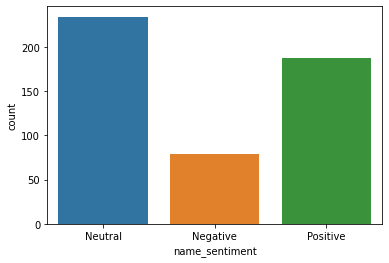

In [77]:
ax = sns.countplot(x="name_sentiment", data=df_engineoil)

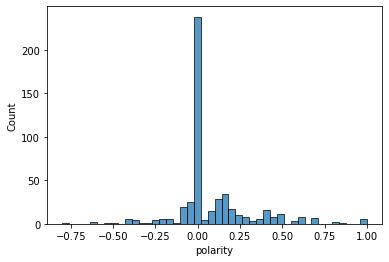

In [78]:
ab = sns.histplot(x="polarity", data=df_engineoil)

<AxesSubplot:xlabel='polarity', ylabel='created_at'>

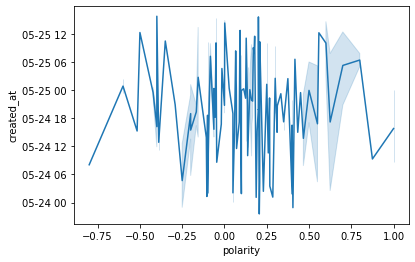

In [79]:
sns.lineplot(y='created_at', x="polarity", data=df_engineoil)

# tyre analysis

In [80]:
df_tyre = load_dataset("../input/tweet-data/tweet_data_tyre.csv")

In [81]:
df_tyre.dtypes

Unnamed: 0      int64
created_at     object
screen_name    object
location       object
text           object
dtype: object

In [82]:
df_tyre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   413 non-null    int64 
 1   created_at   413 non-null    object
 2   screen_name  413 non-null    object
 3   location     361 non-null    object
 4   text         413 non-null    object
dtypes: int64(1), object(4)
memory usage: 16.3+ KB


In [83]:
basic_statistical_analysis(df_tyre)

Shape info for the df =	 (413, 5)
% of null values = 
 Unnamed: 0     0.000000
created_at     0.000000
screen_name    0.000000
location       0.125908
text           0.000000
dtype: float64


0

In [84]:
df_tyre['created_at'] = pd.to_datetime(df_tyre['created_at'], format='%Y-%m-%d %H:%M:%S' )

In [85]:
df_tyre.info() #converted to datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   413 non-null    int64         
 1   created_at   413 non-null    datetime64[ns]
 2   screen_name  413 non-null    object        
 3   location     361 non-null    object        
 4   text         413 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 16.3+ KB


In [86]:
lower_casing(df_tyre).text_lower.head()

0    legendary history of 50 years\n1972 historical...
1    each of asa's pos solutions include software i...
2    if you focus on the positive, all you'll see i...
3    a classic french car which was parked up on th...
4    that time they got you covered 🙏🏻😘  ~ waitin’ ...
Name: text_lower, dtype: object

In [87]:
remove_url(df_tyre).final_text.head()

0    legendary history of 50 years\n1972 historical...
1    each of asa's pos solutions include software i...
2    if you focus on the positive, all you'll see i...
3    a classic french car which was parked up on th...
4    that time they got you covered 🙏🏻😘  ~ waitin’ ...
Name: final_text, dtype: object

In [88]:
idf_values(df_tyre)

(           feature_name       idf
 724           legendary  6.332719
 846          nandmotors  6.332719
 789              mayday  6.332719
 790  maythe4thbewithyou  6.332719
 792            mechanic  6.332719
 793               media  6.332719
 794              medway  6.332719
 795                meet  6.332719
 797            mercedes  6.332719
 799              merely  6.332719
 803             mileage  6.332719
 804             million  6.332719
 805                mind  6.332719
 806                mine  6.332719
 807              mining  6.332719
 810                miss  6.332719
 811               mitas  6.332719
 812                  mo  6.332719
 818              monkey  6.332719
 819     monkeysculpture  6.332719,
        feature_name       idf
 1403           what  3.000514
 617   hometyregroup  3.000514
 853           needs  3.000514
 1430           with  2.948329
 152              at  2.948329
 177              be  2.836211
 140             are  2.821173
 1305           

In [89]:
sentiment_calculation(df_tyre).head()

,Unnamed: 0,created_at,screen_name,location,text,text_lower,final_text,comment,polarity,tags,sentiment
0,0,2021-05-05 01:00:00,japan_oz,日本,Legendary history of 50 years\n1972 Historical...,legendary history of 50 years\n1972 historical...,legendary history of 50 years\n1972 historical...,"(l, e, g, e, n, d, a, r, y, , h, i, s, t, o, ...",0.500000,"[(legendary, JJ), (history, NN), (of, IN), (50...","(0.5, 0.5)"
1,1,2021-05-04 23:00:04,asa_tire,NaN,Each of ASA's POS solutions include software i...,each of asa's pos solutions include software i...,each of asa's pos solutions include software i...,"(e, a, c, h, , o, f, , a, s, a, ', s, , p, ...",0.000000,"[(each, DT), (of, IN), (asa, NN), ('s, POS), (...","(0.0, 0.0)"
2,2,2021-05-03 23:11:23,asa_tire,NaN,"If you focus on the positive, all you'll see i...","if you focus on the positive, all you'll see i...","if you focus on the positive, all you'll see i...","(i, f, , y, o, u, , f, o, c, u, s, , o, n, ...",0.227273,"[(if, IN), (you, PRP), (focus, VBP), (on, IN),...","(0.22727272727272727, 0.5454545454545454)"
3,3,2021-05-03 10:12:52,JLowPhotos,"Widnes, England",A classic french car which was parked up on th...,a classic french car which was parked up on th...,a classic french car which was parked up on th...,"(a, , c, l, a, s, s, i, c, , f, r, e, n, c, ...",0.055556,"[(a, DT), (classic, JJ), (french, JJ), (car, N...","(0.05555555555555555, 0.05555555555555555)"
4,4,2021-05-01 20:02:21,DazzLov3,NaN,That Time They Got You Covered 🙏🏻😘 ~ Waitin’ ...,that time they got you covered 🙏🏻😘 ~ waitin’ ...,that time they got you covered 🙏🏻😘 ~ waitin’ ...,"(t, h, a, t, , t, i, m, e, , t, h, e, y, , ...",0.000000,"[(that, DT), (time, NN), (they, PRP), (got, VB...","(0.0, 0.0)"


In [90]:
sentiment_name(df_tyre).head()

,Unnamed: 0,created_at,screen_name,location,text,text_lower,final_text,comment,polarity,tags,sentiment,name_sentiment
0,0,2021-05-05 01:00:00,japan_oz,日本,Legendary history of 50 years\n1972 Historical...,legendary history of 50 years\n1972 historical...,legendary history of 50 years\n1972 historical...,"(l, e, g, e, n, d, a, r, y, , h, i, s, t, o, ...",0.500000,"[(legendary, JJ), (history, NN), (of, IN), (50...","(0.5, 0.5)",Positive
1,1,2021-05-04 23:00:04,asa_tire,NaN,Each of ASA's POS solutions include software i...,each of asa's pos solutions include software i...,each of asa's pos solutions include software i...,"(e, a, c, h, , o, f, , a, s, a, ', s, , p, ...",0.000000,"[(each, DT), (of, IN), (asa, NN), ('s, POS), (...","(0.0, 0.0)",Neutral
2,2,2021-05-03 23:11:23,asa_tire,NaN,"If you focus on the positive, all you'll see i...","if you focus on the positive, all you'll see i...","if you focus on the positive, all you'll see i...","(i, f, , y, o, u, , f, o, c, u, s, , o, n, ...",0.227273,"[(if, IN), (you, PRP), (focus, VBP), (on, IN),...","(0.22727272727272727, 0.5454545454545454)",Positive
3,3,2021-05-03 10:12:52,JLowPhotos,"Widnes, England",A classic french car which was parked up on th...,a classic french car which was parked up on th...,a classic french car which was parked up on th...,"(a, , c, l, a, s, s, i, c, , f, r, e, n, c, ...",0.055556,"[(a, DT), (classic, JJ), (french, JJ), (car, N...","(0.05555555555555555, 0.05555555555555555)",Positive
4,4,2021-05-01 20:02:21,DazzLov3,NaN,That Time They Got You Covered 🙏🏻😘 ~ Waitin’ ...,that time they got you covered 🙏🏻😘 ~ waitin’ ...,that time they got you covered 🙏🏻😘 ~ waitin’ ...,"(t, h, a, t, , t, i, m, e, , t, h, e, y, , ...",0.000000,"[(that, DT), (time, NN), (they, PRP), (got, VB...","(0.0, 0.0)",Neutral


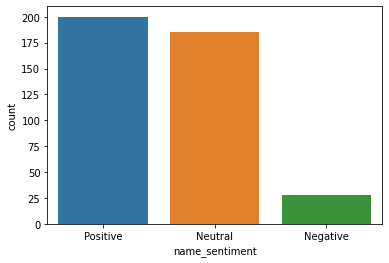

In [91]:
ax = sns.countplot(x="name_sentiment", data=df_tyre)

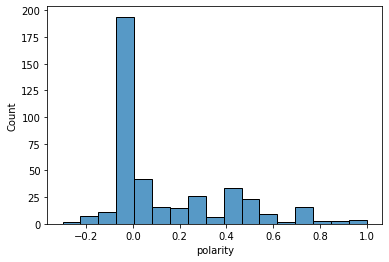

In [92]:
ab = sns.histplot(x="polarity", data=df_tyre)

<AxesSubplot:xlabel='polarity', ylabel='created_at'>

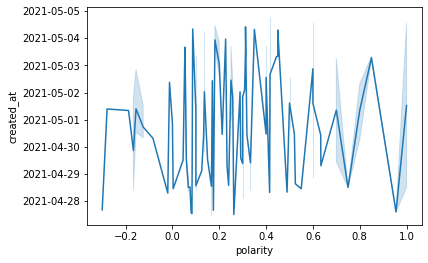

In [93]:
sns.lineplot(y='created_at', x="polarity", data=df_tyre)

## Test Data Analysis (Based on a set of products in the automobile industry)

### Products used are 
- Car seat cover
- Car wash shampoo
- car vacuum cleaner

## Car-seat Cover Analysis

In [94]:
df_carseatcover = load_dataset("../input/test-data/tweet_data_carseatcover.csv")

In [95]:
df_carseatcover.shape

(565, 5)

In [96]:
df_carseatcover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   565 non-null    int64 
 1   created_at   565 non-null    object
 2   screen_name  565 non-null    object
 3   location     348 non-null    object
 4   text         565 non-null    object
dtypes: int64(1), object(4)
memory usage: 22.2+ KB


In [97]:
basic_statistical_analysis(df_carseatcover)

Shape info for the df =	 (565, 5)
% of null values = 
 Unnamed: 0     0.000000
created_at     0.000000
screen_name    0.000000
location       0.384071
text           0.000000
dtype: float64


0

In [98]:
df_carseatcover['created_at'] = pd.to_datetime(df_carseatcover['created_at'], format='%Y-%m-%d %H:%M:%S' )

In [99]:
df_carseatcover.info() #converted to datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   565 non-null    int64         
 1   created_at   565 non-null    datetime64[ns]
 2   screen_name  565 non-null    object        
 3   location     348 non-null    object        
 4   text         565 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 22.2+ KB


In [100]:
lower_casing(df_carseatcover).text_lower.head()

0    we got a seat cover for the car. 10/10 https:/...
1    @vibepay hiii £280 would be absolutely fabulou...
2    rt @jeanpaulus53: @connectonitsha for your car...
3    #hashtag3 dog car seat cover https://t.co/cfbe...
4    dog car seat cover 🚗 ❤️ 📦\n$ 85.00 and free sh...
Name: text_lower, dtype: object

In [101]:
remove_url(df_carseatcover).final_text.head()

0              we got a seat cover for the car. 10/10 
1    @vibepay hiii £280 would be absolutely fabulou...
2    rt @jeanpaulus53: @connectonitsha for your car...
3                        #hashtag3 dog car seat cover 
4    dog car seat cover 🚗 ❤️ 📦\n$ 85.00 and free sh...
Name: final_text, dtype: object

In [102]:
idf_values(df_carseatcover)

(    feature_name       idf
 656         item  6.645447
 758      matador  6.645447
 737        lower  6.645447
 738           lt  6.645447
 739         lune  6.645447
 740    lussogear  6.645447
 741    luxurious  6.645447
 743      machine  6.645447
 745   maiadunphy  6.645447
 746          mak  6.645447
 748        makes  6.645447
 749       making  6.645447
 754         many  6.645447
 757     matablog  6.645447
 759      matches  6.645447
 734        looks  6.645447
 763      maximum  6.645447
 764          may  6.645447
 767         mein  6.645447
 768       memory  6.645447,
            feature_name       idf
 481                faux  3.387350
 1270              white  3.278151
 247                camo  3.278151
 848                  on  3.261057
 506              fleece  3.211460
 1305                you  3.164207
 1164               this  3.090099
 1306               your  3.048135
 1221                 up  2.994789
 639                  in  2.969146
 167                baby  

In [103]:
sentiment_calculation(df_carseatcover).head()

,Unnamed: 0,created_at,screen_name,location,text,text_lower,final_text,comment,polarity,tags,sentiment
0,0,2021-05-28 13:57:25,aj_penguin,NaN,We got a seat cover for the car. 10/10 https:/...,we got a seat cover for the car. 10/10 https:/...,we got a seat cover for the car. 10/10,"(w, e, , g, o, t, , a, , s, e, a, t, , c, ...",0.0000,"[(we, PRP), (got, VBD), (a, DT), (seat, NN), (...","(0.0, 0.0)"
1,1,2021-05-28 11:56:40,itsbr0gan,NCL,@VibePay Hiii £280 would be absolutely fabulou...,@vibepay hiii £280 would be absolutely fabulou...,@vibepay hiii £280 would be absolutely fabulou...,"(@, v, i, b, e, p, a, y, , h, i, i, i, , £, ...",0.4000,"[(@, JJ), (vibepay, NN), (hiii, NN), (£280, NN...","(0.4, 1.0)"
2,2,2021-05-28 11:03:19,HonNonny,"Anambra, Nigeria",RT @Jeanpaulus53: @ConnectOnitsha For your car...,rt @jeanpaulus53: @connectonitsha for your car...,rt @jeanpaulus53: @connectonitsha for your car...,"(r, t, , @, j, e, a, n, p, a, u, l, u, s, 5, ...",0.0000,"[(rt, NN), (@, NN), (jeanpaulus53, NN), (@, NN...","(0.0, 0.0)"
3,3,2021-05-28 10:46:23,TheCarGear1,NaN,#hashtag3 Dog Car Seat Cover https://t.co/cfBe...,#hashtag3 dog car seat cover https://t.co/cfbe...,#hashtag3 dog car seat cover,"(#, h, a, s, h, t, a, g, 3, , d, o, g, , c, ...",0.0000,"[(hashtag3, NN), (dog, NN), (car, NN), (seat, ...","(0.0, 0.0)"
4,4,2021-05-28 10:08:45,adriverz,NaN,Dog Car Seat Cover 🚗 ❤️ 📦\n$ 85.00 and FREE Sh...,dog car seat cover 🚗 ❤️ 📦\n$ 85.00 and free sh...,dog car seat cover 🚗 ❤️ 📦\n$ 85.00 and free sh...,"(d, o, g, , c, a, r, , s, e, a, t, , c, o, ...",0.5125,"[(dog, NN), (car, NN), (seat, NN), (cover, NN)...","(0.5125, 0.7)"


In [104]:
sentiment_name(df_carseatcover).head()

,Unnamed: 0,created_at,screen_name,location,text,text_lower,final_text,comment,polarity,tags,sentiment,name_sentiment
0,0,2021-05-28 13:57:25,aj_penguin,NaN,We got a seat cover for the car. 10/10 https:/...,we got a seat cover for the car. 10/10 https:/...,we got a seat cover for the car. 10/10,"(w, e, , g, o, t, , a, , s, e, a, t, , c, ...",0.0000,"[(we, PRP), (got, VBD), (a, DT), (seat, NN), (...","(0.0, 0.0)",Neutral
1,1,2021-05-28 11:56:40,itsbr0gan,NCL,@VibePay Hiii £280 would be absolutely fabulou...,@vibepay hiii £280 would be absolutely fabulou...,@vibepay hiii £280 would be absolutely fabulou...,"(@, v, i, b, e, p, a, y, , h, i, i, i, , £, ...",0.4000,"[(@, JJ), (vibepay, NN), (hiii, NN), (£280, NN...","(0.4, 1.0)",Positive
2,2,2021-05-28 11:03:19,HonNonny,"Anambra, Nigeria",RT @Jeanpaulus53: @ConnectOnitsha For your car...,rt @jeanpaulus53: @connectonitsha for your car...,rt @jeanpaulus53: @connectonitsha for your car...,"(r, t, , @, j, e, a, n, p, a, u, l, u, s, 5, ...",0.0000,"[(rt, NN), (@, NN), (jeanpaulus53, NN), (@, NN...","(0.0, 0.0)",Neutral
3,3,2021-05-28 10:46:23,TheCarGear1,NaN,#hashtag3 Dog Car Seat Cover https://t.co/cfBe...,#hashtag3 dog car seat cover https://t.co/cfbe...,#hashtag3 dog car seat cover,"(#, h, a, s, h, t, a, g, 3, , d, o, g, , c, ...",0.0000,"[(hashtag3, NN), (dog, NN), (car, NN), (seat, ...","(0.0, 0.0)",Neutral
4,4,2021-05-28 10:08:45,adriverz,NaN,Dog Car Seat Cover 🚗 ❤️ 📦\n$ 85.00 and FREE Sh...,dog car seat cover 🚗 ❤️ 📦\n$ 85.00 and free sh...,dog car seat cover 🚗 ❤️ 📦\n$ 85.00 and free sh...,"(d, o, g, , c, a, r, , s, e, a, t, , c, o, ...",0.5125,"[(dog, NN), (car, NN), (seat, NN), (cover, NN)...","(0.5125, 0.7)",Positive


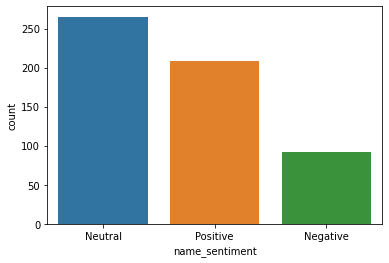

In [105]:
ax = sns.countplot(x="name_sentiment", data=df_carseatcover)

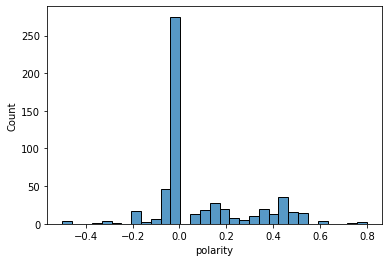

In [106]:
ab = sns.histplot(x="polarity", data=df_carseatcover)

<AxesSubplot:xlabel='polarity', ylabel='created_at'>

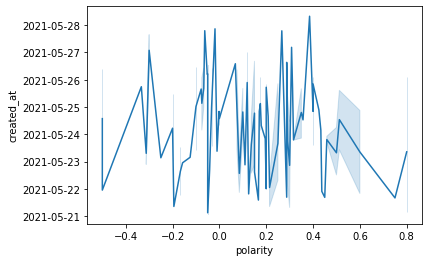

In [107]:
sns.lineplot(y='created_at', x="polarity", data=df_carseatcover)

## Car Shampoo Analysis

In [108]:
df_carshampoo = load_dataset("../input/test-data/tweet_data_carshampoo.csv")

In [109]:
df_carshampoo.shape

(104, 5)

In [110]:
df_carshampoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   104 non-null    int64 
 1   created_at   104 non-null    object
 2   screen_name  104 non-null    object
 3   location     71 non-null     object
 4   text         104 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [111]:
basic_statistical_analysis(df_carshampoo)

Shape info for the df =	 (104, 5)
% of null values = 
 Unnamed: 0     0.000000
created_at     0.000000
screen_name    0.000000
location       0.317308
text           0.000000
dtype: float64


0

In [112]:
df_carshampoo['created_at'] = pd.to_datetime(df_carshampoo['created_at'], format='%Y-%m-%d %H:%M:%S' )

In [113]:
df_carshampoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   104 non-null    int64         
 1   created_at   104 non-null    datetime64[ns]
 2   screen_name  104 non-null    object        
 3   location     71 non-null     object        
 4   text         104 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.2+ KB


In [114]:
lower_casing(df_carshampoo).text_lower.head()

0    @kageboisazz i can shampoo with it, body wash,...
1    @sadriddimboy mandos shampoo comes with shampo...
2    rt @koenigsegg: coming to you this spring. a k...
3    i’m gonna paint my car red so i can think that...
4    rt @designstvt: @educnurture @jackd157 that's ...
Name: text_lower, dtype: object

In [115]:
remove_url(df_carshampoo).final_text.head()

0    @kageboisazz i can shampoo with it, body wash,...
1    @sadriddimboy mandos shampoo comes with shampo...
2    rt @koenigsegg: coming to you this spring. a k...
3    i’m gonna paint my car red so i can think that...
4    rt @designstvt: @educnurture @jackd157 that's ...
Name: final_text, dtype: object

In [116]:
idf_values(df_carshampoo)

(     feature_name       idf
 0              00  4.960813
 409         noche  4.960813
 397          much  4.960813
 399        myself  4.960813
 400           nah  4.960813
 403        needed  4.960813
 404         needs  4.960813
 406        newest  4.960813
 414          oils  4.960813
 274          here  4.960813
 420       organic  4.960813
 421  organisation  4.960813
 422  originalwd40  4.960813
 423         other  4.960813
 428           owl  4.960813
 429         owned  4.960813
 396            mr  4.960813
 395    motorcycle  4.960813
 393          most  4.960813
 392        months  4.960813,
     feature_name       idf
 663         with  3.256065
 306           is  3.256065
 350         like  3.169054
 73          body  3.169054
 675         your  3.089011
 586         this  3.089011
 544           so  2.945910
 674          you  2.945910
 262         hair  2.881372
 631         wash  2.475907
 398           my  2.475907
 496           rt  2.475907
 576         that  2.47590

In [117]:
sentiment_calculation(df_carshampoo).head()

,Unnamed: 0,created_at,screen_name,location,text,text_lower,final_text,comment,polarity,tags,sentiment
0,0,2021-05-26 16:09:59,GoldenNubian_,NaN,"@KageBoiSazz I can shampoo with it, body wash,...","@kageboisazz i can shampoo with it, body wash,...","@kageboisazz i can shampoo with it, body wash,...","(@, k, a, g, e, b, o, i, s, a, z, z, , i, , ...",-0.300000,"[(@, JJ), (kageboisazz, NN), (i, NN), (can, MD...","(-0.3, 0.525)"
1,1,2021-05-26 16:06:59,yaboidaniell,"Los Santos, San Andreas",@sadriddimboy mandos shampoo comes with shampo...,@sadriddimboy mandos shampoo comes with shampo...,@sadriddimboy mandos shampoo comes with shampo...,"(@, s, a, d, r, i, d, d, i, m, b, o, y, , m, ...",0.000000,"[(@, JJ), (sadriddimboy, NN), (mandos, NN), (s...","(0.0, 0.0)"
2,2,2021-05-26 14:57:20,tS_isBack,Neo Tilted,RT @koenigsegg: Coming to you this spring. A K...,rt @koenigsegg: coming to you this spring. a k...,rt @koenigsegg: coming to you this spring. a k...,"(r, t, , @, k, o, e, n, i, g, s, e, g, g, :, ...",0.136364,"[(rt, NN), (@, NN), (koenigsegg, NN), (coming,...","(0.13636363636363635, 0.45454545454545453)"
3,3,2021-05-26 14:54:25,jordan_ecc19,"berea, oh",i’m gonna paint my car red so i can think that...,i’m gonna paint my car red so i can think that...,i’m gonna paint my car red so i can think that...,"(i, ’, m, , g, o, n, n, a, , p, a, i, n, t, ...",0.000000,"[(i, NN), (’, VBP), (m, NN), (gon, NN), (na, T...","(0.0, 0.0)"
4,4,2021-05-26 14:09:31,Africanjabu,South Africa,RT @DesignsTvt: @EducNurture @JackD157 That's ...,rt @designstvt: @educnurture @jackd157 that's ...,rt @designstvt: @educnurture @jackd157 that's ...,"(r, t, , @, d, e, s, i, g, n, s, t, v, t, :, ...",0.900000,"[(rt, NN), (@, NN), (designstvt, NN), (@, JJ),...","(0.9, 1.0)"


In [118]:
sentiment_name(df_carshampoo).head()

,Unnamed: 0,created_at,screen_name,location,text,text_lower,final_text,comment,polarity,tags,sentiment,name_sentiment
0,0,2021-05-26 16:09:59,GoldenNubian_,NaN,"@KageBoiSazz I can shampoo with it, body wash,...","@kageboisazz i can shampoo with it, body wash,...","@kageboisazz i can shampoo with it, body wash,...","(@, k, a, g, e, b, o, i, s, a, z, z, , i, , ...",-0.300000,"[(@, JJ), (kageboisazz, NN), (i, NN), (can, MD...","(-0.3, 0.525)",Negative
1,1,2021-05-26 16:06:59,yaboidaniell,"Los Santos, San Andreas",@sadriddimboy mandos shampoo comes with shampo...,@sadriddimboy mandos shampoo comes with shampo...,@sadriddimboy mandos shampoo comes with shampo...,"(@, s, a, d, r, i, d, d, i, m, b, o, y, , m, ...",0.000000,"[(@, JJ), (sadriddimboy, NN), (mandos, NN), (s...","(0.0, 0.0)",Neutral
2,2,2021-05-26 14:57:20,tS_isBack,Neo Tilted,RT @koenigsegg: Coming to you this spring. A K...,rt @koenigsegg: coming to you this spring. a k...,rt @koenigsegg: coming to you this spring. a k...,"(r, t, , @, k, o, e, n, i, g, s, e, g, g, :, ...",0.136364,"[(rt, NN), (@, NN), (koenigsegg, NN), (coming,...","(0.13636363636363635, 0.45454545454545453)",Positive
3,3,2021-05-26 14:54:25,jordan_ecc19,"berea, oh",i’m gonna paint my car red so i can think that...,i’m gonna paint my car red so i can think that...,i’m gonna paint my car red so i can think that...,"(i, ’, m, , g, o, n, n, a, , p, a, i, n, t, ...",0.000000,"[(i, NN), (’, VBP), (m, NN), (gon, NN), (na, T...","(0.0, 0.0)",Neutral
4,4,2021-05-26 14:09:31,Africanjabu,South Africa,RT @DesignsTvt: @EducNurture @JackD157 That's ...,rt @designstvt: @educnurture @jackd157 that's ...,rt @designstvt: @educnurture @jackd157 that's ...,"(r, t, , @, d, e, s, i, g, n, s, t, v, t, :, ...",0.900000,"[(rt, NN), (@, NN), (designstvt, NN), (@, JJ),...","(0.9, 1.0)",Positive


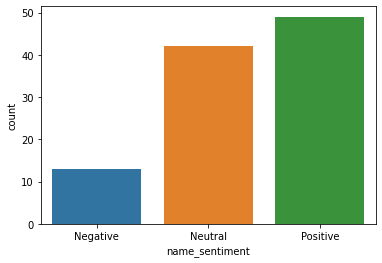

In [119]:
ax = sns.countplot(x="name_sentiment", data=df_carshampoo)

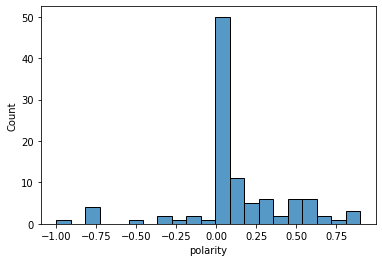

In [120]:
ab = sns.histplot(x="polarity", data=df_carshampoo)

<AxesSubplot:xlabel='polarity', ylabel='created_at'>

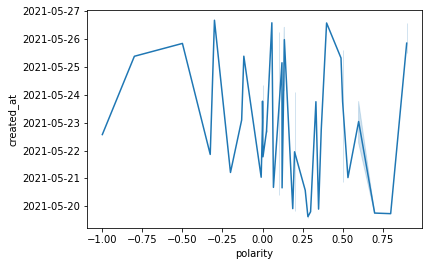

In [121]:
sns.lineplot(y='created_at', x="polarity", data=df_carshampoo)

## Car vacuum cleaner Analysis

In [122]:
df_carvacuumcleaner = load_dataset("../input/test-data/tweet_data_carvacuumcleaner.csv")

In [123]:
df_carvacuumcleaner.shape

(320, 5)

In [124]:
df_carvacuumcleaner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   320 non-null    int64 
 1   created_at   320 non-null    object
 2   screen_name  320 non-null    object
 3   location     192 non-null    object
 4   text         320 non-null    object
dtypes: int64(1), object(4)
memory usage: 12.6+ KB


In [125]:
basic_statistical_analysis(df_carvacuumcleaner)

Shape info for the df =	 (320, 5)
% of null values = 
 Unnamed: 0     0.0
created_at     0.0
screen_name    0.0
location       0.4
text           0.0
dtype: float64


0

In [126]:
df_carvacuumcleaner['created_at'] = pd.to_datetime(df_carvacuumcleaner['created_at'], format='%Y-%m-%d %H:%M:%S' )

In [127]:
df_carvacuumcleaner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   320 non-null    int64         
 1   created_at   320 non-null    datetime64[ns]
 2   screen_name  320 non-null    object        
 3   location     192 non-null    object        
 4   text         320 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 12.6+ KB


In [128]:
lower_casing(df_carvacuumcleaner).text_lower.head()

0    unique and cool products you want. you just do...
1    i'm selling local stock wireless cordless vacu...
2    unique and cool products you want. you just do...
3    #instabike #ktm strong power car vacuum cleane...
4    grikey wireless vacuum cleaner for car vacuum ...
Name: text_lower, dtype: object

In [129]:
remove_url(df_carvacuumcleaner).final_text.head()

0    unique and cool products you want. you just do...
1    i'm selling local stock wireless cordless vacu...
2    unique and cool products you want. you just do...
3    #instabike #ktm strong power car vacuum cleane...
4    grikey wireless vacuum cleaner for car vacuum ...
Name: final_text, dtype: object

In [130]:
idf_values(df_carvacuumcleaner)

(      feature_name       idf
 694         zipper  6.078294
 409          mijia  6.078294
 407          miele  6.078294
 406          meter  6.078294
 404         medium  6.078294
 403       mecoeawr  6.078294
 402       mechanic  6.078294
 401             me  6.078294
 400  matesshopping  6.078294
 398           make  6.078294
 397       maintain  6.078294
 396           main  6.078294
 394         luxury  6.078294
 393            low  6.078294
 390           lose  6.078294
 389         looked  6.078294
 388           look  6.078294
 387       lockdown  6.078294
 384         listen  6.078294
 382            lin  6.078294,
     feature_name       idf
 0             00  3.370244
 205     cordless  3.245081
 610         this  3.187922
 472     portable  3.033772
 317     handheld  2.921294
 195      compact  2.612558
 691          yet  2.156321
 483     products  2.156321
 241          don  2.156321
 632       unique  2.156321
 201         cool  2.156321
 369         know  2.146468
 360 

In [131]:
sentiment_calculation(df_carvacuumcleaner).head()

,Unnamed: 0,created_at,screen_name,location,text,text_lower,final_text,comment,polarity,tags,sentiment
0,0,2021-05-28 13:31:14,vahelpers,"Gainesville, FL",Unique And Cool Products You Want. You Just Do...,unique and cool products you want. you just do...,unique and cool products you want. you just do...,"(u, n, i, q, u, e, , a, n, d, , c, o, o, l, ...",0.362500,"[(unique, NN), (and, CC), (cool, NN), (product...","(0.3625, 0.825)"
1,1,2021-05-28 12:41:28,teochsg,NaN,I'm selling Local Stock Wireless Cordless Vacu...,i'm selling local stock wireless cordless vacu...,i'm selling local stock wireless cordless vacu...,"(i, ', m, , s, e, l, l, i, n, g, , l, o, c, ...",0.000000,"[(i, JJ), ('m, VBP), (selling, VBG), (local, J...","(0.0, 0.0)"
2,2,2021-05-28 12:30:31,vahelpers,"Gainesville, FL",Unique And Cool Products You Want. You Just Do...,unique and cool products you want. you just do...,unique and cool products you want. you just do...,"(u, n, i, q, u, e, , a, n, d, , c, o, o, l, ...",0.362500,"[(unique, NN), (and, CC), (cool, NN), (product...","(0.3625, 0.825)"
3,3,2021-05-28 12:17:08,drivvi_co,NaN,#instabike #ktm Strong Power Car Vacuum Cleane...,#instabike #ktm strong power car vacuum cleane...,#instabike #ktm strong power car vacuum cleane...,"(#, i, n, s, t, a, b, i, k, e, , #, k, t, m, ...",0.212500,"[(instabike, JJ), (ktm, NN), (strong, JJ), (po...","(0.21249999999999997, 0.36666666666666664)"
4,4,2021-05-28 12:09:59,modernly8,NaN,GRIKEY Wireless Vacuum Cleaner For Car Vacuum ...,grikey wireless vacuum cleaner for car vacuum ...,grikey wireless vacuum cleaner for car vacuum ...,"(g, r, i, k, e, y, , w, i, r, e, l, e, s, s, ...",-0.008333,"[(grikey, NN), (wireless, NN), (vacuum, NN), (...","(-0.008333333333333333, 0.0)"


In [132]:
sentiment_name(df_carvacuumcleaner).head()

,Unnamed: 0,created_at,screen_name,location,text,text_lower,final_text,comment,polarity,tags,sentiment,name_sentiment
0,0,2021-05-28 13:31:14,vahelpers,"Gainesville, FL",Unique And Cool Products You Want. You Just Do...,unique and cool products you want. you just do...,unique and cool products you want. you just do...,"(u, n, i, q, u, e, , a, n, d, , c, o, o, l, ...",0.362500,"[(unique, NN), (and, CC), (cool, NN), (product...","(0.3625, 0.825)",Positive
1,1,2021-05-28 12:41:28,teochsg,NaN,I'm selling Local Stock Wireless Cordless Vacu...,i'm selling local stock wireless cordless vacu...,i'm selling local stock wireless cordless vacu...,"(i, ', m, , s, e, l, l, i, n, g, , l, o, c, ...",0.000000,"[(i, JJ), ('m, VBP), (selling, VBG), (local, J...","(0.0, 0.0)",Neutral
2,2,2021-05-28 12:30:31,vahelpers,"Gainesville, FL",Unique And Cool Products You Want. You Just Do...,unique and cool products you want. you just do...,unique and cool products you want. you just do...,"(u, n, i, q, u, e, , a, n, d, , c, o, o, l, ...",0.362500,"[(unique, NN), (and, CC), (cool, NN), (product...","(0.3625, 0.825)",Positive
3,3,2021-05-28 12:17:08,drivvi_co,NaN,#instabike #ktm Strong Power Car Vacuum Cleane...,#instabike #ktm strong power car vacuum cleane...,#instabike #ktm strong power car vacuum cleane...,"(#, i, n, s, t, a, b, i, k, e, , #, k, t, m, ...",0.212500,"[(instabike, JJ), (ktm, NN), (strong, JJ), (po...","(0.21249999999999997, 0.36666666666666664)",Positive
4,4,2021-05-28 12:09:59,modernly8,NaN,GRIKEY Wireless Vacuum Cleaner For Car Vacuum ...,grikey wireless vacuum cleaner for car vacuum ...,grikey wireless vacuum cleaner for car vacuum ...,"(g, r, i, k, e, y, , w, i, r, e, l, e, s, s, ...",-0.008333,"[(grikey, NN), (wireless, NN), (vacuum, NN), (...","(-0.008333333333333333, 0.0)",Negative


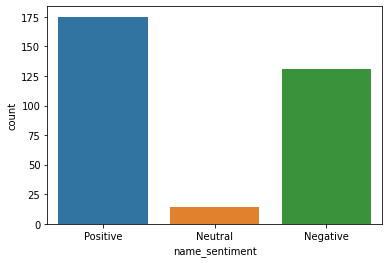

In [133]:
ax = sns.countplot(x="name_sentiment", data=df_carvacuumcleaner)

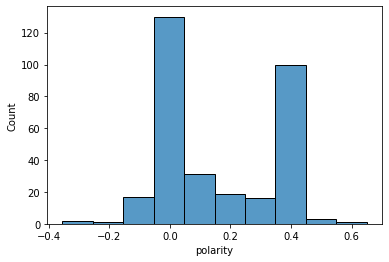

In [134]:
ab = sns.histplot(x="polarity", data=df_carvacuumcleaner)

<AxesSubplot:xlabel='polarity', ylabel='created_at'>

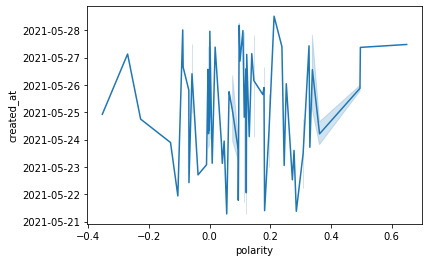

In [135]:
sns.lineplot(y='created_at', x="polarity", data=df_carvacuumcleaner)

### Regression Features for each product

#### Create a table with sales in last quater, total tweets for a category, positive tweets, negative tweets and neutral tweets. Different models considering various features set
*Feature sets are*
- Sales figure, positive tweets
- Sales figures, negative tweets, positive tweets
- Sales figures, negative tweets, positive & neutral tweets

*The final conclusion will be, based on the model we will able to predict the sales of any other given automobile product.*

```Process cycle```
- Input the sales (unit price/ total units sold, positive tweets, negative tweets) 
- Output will be the predicted units sold 
- The error of the model will be calculated and incorporated in our predictions

### Tweets info for the products 
- Wheels
- Car cover
- Engine oil
- tyres
- windsheild

### Tweets info for the products in test data

- Car seat cover
- Car Shampoo
- Car Vacuum cleaner

In [136]:
total_tweets_wheels = df_wheels.shape[0]
total_tweets_carcover = df_carcover.shape[0]
total_tweets_engineoil = df_engineoil.shape[0]
total_tweets_windshield = df_windshield.shape[0]
total_tweets_tyre = df_tyre.shape[0]
total_tweets_carfreshner = df_carfreshner.shape[0]

In [137]:
total_tweets_carseatcover = df_carseatcover.shape[0]
total_tweets_carshampoo = df_carshampoo.shape[0]
total_tweets_carvacuumcleaner = df_carvacuumcleaner.shape[0]

In [138]:
positive_tweets_wheels = df_wheels.loc[df_wheels['name_sentiment'] == 'Positive', 'name_sentiment'].count()
positive_tweets_carcover = df_carcover.loc[df_carcover['name_sentiment'] == 'Positive', 'name_sentiment'].count()
positive_tweets_engineoil = df_engineoil.loc[df_engineoil['name_sentiment'] == 'Positive', 'name_sentiment'].count()
positive_tweets_tyre = df_tyre.loc[df_tyre['name_sentiment'] == 'Positive', 'name_sentiment'].count()
positive_tweets_windshield = df_windshield.loc[df_windshield['name_sentiment'] == 'Positive', 'name_sentiment'].count()
positive_tweets_carfreshner = df_carfreshner.loc[df_carfreshner['name_sentiment']=='Positive','name_sentiment'].count()

In [139]:
positive_tweets_carseatcover = df_carseatcover.loc[df_carseatcover['name_sentiment'] == 'Positive', 'name_sentiment'].count()
positive_tweets_carshampoo = df_carshampoo.loc[df_carshampoo['name_sentiment'] == 'Positive', 'name_sentiment'].count()
positive_tweets_carvacuumcleaner = df_carvacuumcleaner.loc[df_carvacuumcleaner['name_sentiment'] == 'Positive', 'name_sentiment'].count()

In [140]:
negative_tweets_wheels = df_wheels.loc[df_wheels['name_sentiment'] == 'Negative', 'name_sentiment'].count()
negative_tweets_carcover = df_carcover.loc[df_carcover['name_sentiment'] == 'Negative', 'name_sentiment'].count()
negative_tweets_engineoil = df_engineoil.loc[df_engineoil['name_sentiment'] == 'Negative', 'name_sentiment'].count()
negative_tweets_windshield = df_windshield.loc[df_windshield['name_sentiment'] == 'Negative', 'name_sentiment'].count()
negative_tweets_tyre = df_tyre.loc[df_tyre['name_sentiment'] == 'Negative', 'name_sentiment'].count()
negative_tweets_carfreshner = df_carfreshner.loc[df_carfreshner['name_sentiment'] == 'Negative','name_sentiment'].count()

In [141]:
negative_tweets_carseatcover = df_carseatcover.loc[df_carseatcover['name_sentiment'] == 'Negative', 'name_sentiment'].count()
negative_tweets_carshampoo = df_carshampoo.loc[df_carshampoo['name_sentiment'] == 'Negative', 'name_sentiment'].count()
negative_tweets_carvacuumcleaner = df_carvacuumcleaner.loc[df_carvacuumcleaner['name_sentiment'] == 'Negative', 'name_sentiment'].count()

In [142]:
neutral_tweets_wheels = df_wheels.loc[df_wheels['name_sentiment'] == 'Neutral', 'name_sentiment'].count()
neutral_tweets_carcover = df_carcover.loc[df_carcover['name_sentiment'] == 'Neutral', 'name_sentiment'].count()
neutral_tweets_engineoil = df_engineoil.loc[df_engineoil['name_sentiment'] == 'Neutral', 'name_sentiment'].count()
neutral_tweets_windshield = df_windshield.loc[df_windshield['name_sentiment'] == 'Neutral', 'name_sentiment'].count()
neutral_tweets_tyre = df_tyre.loc[df_tyre['name_sentiment'] == 'Neutral', 'name_sentiment'].count()
neutral_tweets_carfreshner = df_carfreshner.loc[df_carfreshner['name_sentiment'] == 'Neutral','name_sentiment'].count()

In [143]:
neutral_tweets_carseatcover = df_carseatcover.loc[df_carseatcover['name_sentiment'] == 'Neutral', 'name_sentiment'].count()
neutral_tweets_carshampoo = df_carshampoo.loc[df_carshampoo['name_sentiment'] == 'Neutral', 'name_sentiment'].count()
neutral_tweets_carvacuumcleaner = df_carvacuumcleaner.loc[df_carvacuumcleaner['name_sentiment'] == 'Neutral', 'name_sentiment'].count()

### Sales figures worldwide for the above products (last quater 2020)

### References
- https://www.globenewswire.com/news-release/2020/10/22/2113049/0/en/Michelin-Michelin-announces-sales-of-15-billion-for-the-first-nine-months-of-2020-down-15-at-constant-exchange-rates-with-a-decline-of-5-in-the-third-quarter-reflecting-an-upturn-i.html 

- https://www.prnewswire.com/news-releases/china-zenix-auto-international-limited-reports-fourth-quarter-and-full-year-2020-financial-results-301259201.html 

- https://www.gminsights.com/industry-analysis/automotive-wheel-market 

- https://www.marketwatch.com/press-release/car-covers-market-size-sale-2021-drivers-challenges-and-their-impact-on-growth-and-demand-forecasts-in-2026-2021-05-13 

- https://marketresearch.biz/report/car-covers-market/ 
- https://www.mordorintelligence.com/industry-reports/india-lubricants-market 

- https://economictimes.indiatimes.com/kirloskar-oil-engines-ltd/halfyearly/companyid-29130.cms 

- https://www.nsg.com/-/media/nsg/site-content/ir/financial-reports/3rdquarterfinancialresultsfy2020_e01.pdf 

- https://www.wsj.com/market-data/quotes/JP/5202/financials 

- https://www.researchandmarkets.com/reports/5165432/automotive-glass-market-growth-trends-covid 

- https://www.businesswire.com/news/home/20210222005459/en/Cooper-Tire-Rubber-Company-Reports-Fourth-Quarter-and-Full-Year-2020-Results 

- https://corporate.goodyear.com/en-US/media/news/goodyear-reports-fourth-quarter-2020-results.html 

- https://images.assettype.com/bloombergquint/2020-12/f9fef3ae-cad9-477c-b25d-6a882d75859f/Nirmal_Bang_Tyre_Sector_Initiating_Coverage_15_December_2020.pdf 

### All prices in USD
- Wheels - 20164462.5 (after 5% dedudction), 24300000 (avg) = 22232231.25 

- Car covers = 798600000 

- Engine oil - (liters sold * avg price = 22000000 * 4.83) = 106260000  

- Windsheild = 19000000000

- Tyre = 3700000000 

- Car Freshener - (3.5% CAGR deduction till 2020 from an estimate of 2.5 billion USD sales in 2026) = 2018000000

- Car seat cover - 5100000000

- Car Shampoo - 10360000000

- Car Vacuum cleaner - 10880000000

In [144]:
def convert_million_usd(price):
    convertion_value = 1000000
    return price/convertion_value

In [145]:
sales_wheels = convert_million_usd(22232231.25)
sales_carcover = convert_million_usd(798600000)
sales_engineoil = convert_million_usd(106260000.00)
sales_tyre = convert_million_usd(19000000000)
sales_windshield = convert_million_usd(3700000000)
sales_carfreshner = convert_million_usd(2018000000)

In [146]:
sales_carseatcover = convert_million_usd(5100000000)
sales_carshampoo = convert_million_usd(10360000000)
sales_vacuumcleaner = convert_million_usd(10880000000)

### Obtained summary dataframe

In [147]:
dict_summary = {'Products':['Wheels','Car cover', 'Engine oil', 'Tyre', 'Windshield', 'Car freshner'],
               'Tweets Total':[total_tweets_wheels,total_tweets_carcover,total_tweets_engineoil, total_tweets_tyre, total_tweets_windshield, total_tweets_carfreshner],
               'Positive Tweets': [positive_tweets_wheels,positive_tweets_carcover,positive_tweets_engineoil, positive_tweets_tyre, positive_tweets_windshield, positive_tweets_carfreshner],
               'Negative Tweets': [negative_tweets_wheels,negative_tweets_carcover,negative_tweets_engineoil, negative_tweets_tyre, negative_tweets_windshield, negative_tweets_carfreshner],
               'Neutral Tweets': [neutral_tweets_wheels, neutral_tweets_carcover, neutral_tweets_engineoil, neutral_tweets_tyre, neutral_tweets_windshield, neutral_tweets_carfreshner], 
               'Sales USD': [sales_wheels,sales_carcover,sales_engineoil, sales_tyre, sales_windshield, sales_carfreshner]}


In [148]:
dict_summary_test = {'Products':['Car Seat Cover', 'Car Shampoo', 'Car Vacuum Cleaner'],
               'Tweets Total':[total_tweets_carseatcover,total_tweets_carshampoo,total_tweets_carvacuumcleaner],
               'Positive Tweets': [positive_tweets_carseatcover,positive_tweets_carshampoo,positive_tweets_carvacuumcleaner],
               'Negative Tweets': [negative_tweets_carseatcover,negative_tweets_carshampoo,negative_tweets_carvacuumcleaner],
               'Neutral Tweets': [neutral_tweets_carseatcover,neutral_tweets_carshampoo,neutral_tweets_carvacuumcleaner], 
               'Sales USD': [sales_carseatcover,sales_carshampoo,sales_vacuumcleaner]}


In [149]:
df_summary = pd.DataFrame(dict_summary)
df_summary.head(10)

,Products,Tweets Total,Positive Tweets,Negative Tweets,Neutral Tweets,Sales USD
0,Wheels,500,157,176,167,22.232231
1,Car cover,500,178,81,241,798.600000
2,Engine oil,500,187,79,234,106.260000
3,Tyre,413,200,28,185,19000.000000
4,Windshield,500,166,93,241,3700.000000
5,Car freshner,500,204,76,220,2018.000000


In [150]:
df_summary_test = pd.DataFrame(dict_summary_test)
df_summary_test.head()

,Products,Tweets Total,Positive Tweets,Negative Tweets,Neutral Tweets,Sales USD
0,Car Seat Cover,565,208,92,265,5100.0
1,Car Shampoo,104,49,13,42,10360.0
2,Car Vacuum Cleaner,320,175,131,14,10880.0


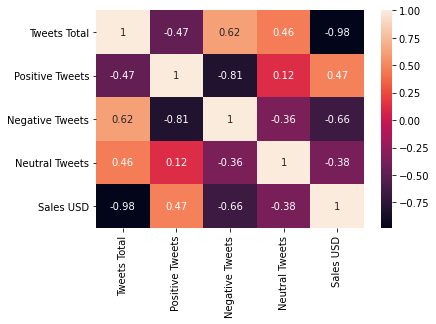

In [151]:
sns.heatmap(df_summary.corr(),annot=True)
plt.show()

### Summary from heatmap
- There is a significant positive correlation b/w total, positive tweets with the sales 
- Hence we will fit the regression line with the above two independent variables

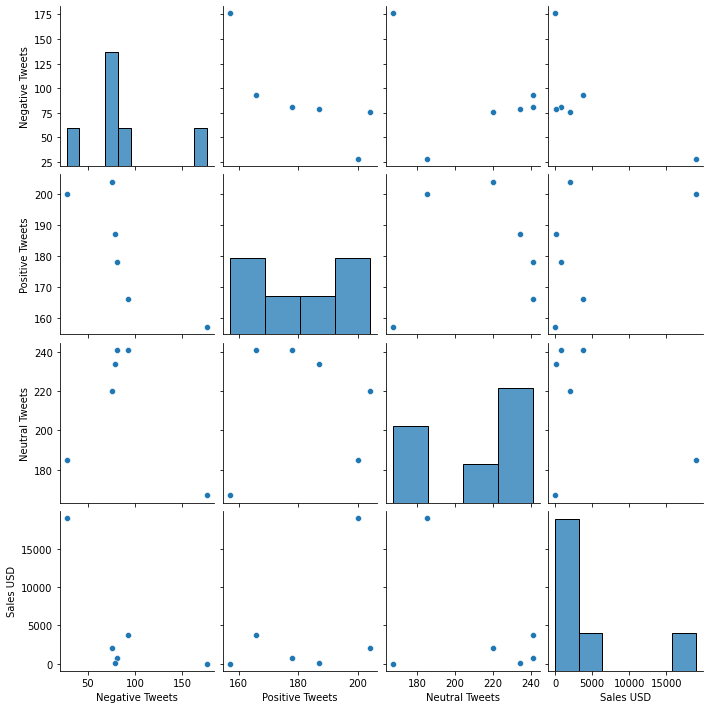

In [152]:
df = df_summary[['Negative Tweets','Positive Tweets','Neutral Tweets', 'Sales USD']]

sns.pairplot(df, kind="scatter")
plt.show()

In [153]:
from scipy.stats import linregress
linregress(df_summary['Neutral Tweets'], df_summary['Sales USD'])

LinregressResult(slope=-87.71847875531232, intercept=23104.415478015377, rvalue=-0.37539815261296827, pvalue=0.46335403309949985, stderr=108.28911768519612)

### VIF(Variance Inflation Factor) calculation to understand multicollinearity of the features

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_summary[['Positive Tweets', 'Negative Tweets']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,feature,VIF Factor
0,Positive Tweets,3.804401
1,Negative Tweets,3.804401


### VIF insights
- vif for the above two are <5 hence possibility of multicollinearity is irradicated

In [155]:
import statsmodels.api as sm
mod = sm.OLS(exog=df_summary[['Positive Tweets', 'Negative Tweets']], endog=df_summary['Sales USD'])
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:              Sales USD   R-squared (uncentered):                   0.580
Model:                            OLS   Adj. R-squared (uncentered):              0.370
Method:                 Least Squares   F-statistic:                              2.759
Date:                Sun, 13 Jun 2021   Prob (F-statistic):                       0.177
Time:                        15:12:14   Log-Likelihood:                         -59.800
No. Observations:                   6   AIC:                                      123.6
Df Residuals:                       4   BIC:                                      123.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

/opt/conda/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


### Inference from the OLS Regression Results

#### Regression Quality

- <b>Independent Variables</b> : Negative Tweets and Positive Tweets , Dependent Variable : Sales USD

- <b>R-squared</b> : It signifies the percentage variation in dependent that is explained by independent variables. Here, an R-squared value of 0.58 denotes there's 58% variation between dependent and independent variables as compared to previous values. We had an R-squared of 0.6 before adding new variables (Winshield, tyre and car freshner).

- <b>Adj. R-squared</b> : This is the modified version of R-squared that has been adjusted for the number of predictors in the model. It increases only when an additional variable adds to the explanatory power to the regression. Here the Adj. R-squared has also increased because of the 3 new variables that have been added.

- <b>F-statistic</b> : An F-test in regression compares the fits of different linear models. Unlike t-tests that can assess only one regression coefficient at a time, the F-test can assess multiple coefficients simultaneously. 

- <b>Prob(F-statistic)</b> : This tells the overall significance of the regression. Prob(F-statistics) depicts the probability of null hypothesis being true.  As per the above results, probability is close to 0. This implies that overall the regression is meaningful.

- <b>Akaike’s Information Criteria (AIC)</b> : It is used for model selection. It penalizes the errors made in case a new variable is added to the regression equation. A lower AIC implies a better model. Our model has an AIC of 123.6 as compared to 71.25 before adding 3 new variables. This is high comparatively but low overall. Hence the model is better fit.

- <b>Bayesian information Criteria (BIC)</b> : It is a variant of AIC where penalties are made more severe.

#### Feature Quality

- <b>P>|t|</b> : Let's examine the feature descriptions from the statsmodels output, which are the rows down at the bottom. We're interested in P>|t|, which is the feature's p-value.
    
    - The p-value is the most common way to talk about whether a feature (and its coefficient) is meaningful or not. P-values are commonly described as the chance that a result was just a lucky/unlucky accident.
    
    - The standard measure of p-value validity is 0.05 i.e., we would get this result accidentally only 5% of the time and this is called Statistical Significance.
    
    - If we look at the p-values of Negative tweets, it is 0.08 for Positive tweets and 0.19 for Negative tweets which does not meet the 0.05 threshold for statistical significance exactly but close to the tolerance value. It's saying there's a 8% (for positive tweets), 19% (for Neegative tweets) chance of this just being an accident, as opposed to under a 5% chance except for the fact that 0.05 is a completely arbitrary but commonly accepted measure.
    
    - Therefore, we can infer that p-values are not used to choose between models. They are used to determine if the regression model meets our standard of statistical significance.
    

 ### Regression test results that check for underlying assumptions
 

#### Normalcy
 
 - <b>Omnibus/Prob(Omnibus)</b> : A test of the skewness and kurtosis of the residual. A value close to 0 would indicate normalcy. The Prob(Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. We hope to see something close to 1 here. A low Omnibus and a high Prob(Omnibus) would indicate that our data is normally distributed. But in the above results, we have nan so we can't conclude anything. Hence, we can see the results of Jarque-Bera (JB) test.
 
 - <b>Jarque-Bera(JB)/Prob(JB)</b> : Like the Omnibus test in that it tests both skew and kurtosis. We hope to see in this test a confirmation of the Omnibus test. We have a JB of 0.6 and Prob(JB) of 0.7 which is close to 1. We can see that both are not inversely related, we cannot estimate that the residuals are normally distributed. 
 
#### Data Symmetry
 
 - <b>Skew</b> : Skew should be close to zero, indicating the residual distribution is normal.We have a skew of 0.56 which is not close to 0 but a little trailing towards the positive tail. This value also drives the Omnibus. This result is a little high, and indicates the presence of skewness.
 
#### Peaks
 
 - <b>Kurtosis</b> : A measure of "peakiness", or curvature of the data. Higher peaks lead to greater Kurtosis. Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, implying a better model with few outliers.
 
#### Homoskedasticity
 
 - <b>Durbin-Watson</b> : Tests for homoskedasticity. We hope to have a value between 1 and 2. In this case we have a value of 2.2 which is a little higher than 2 , but can be considered to be within limits.
 
#### Sensitivity
 
 - <b>Condition Number</b> : This test measures the sensitivity of a function's output as compared to its input. When we have multicollinearity, we can expect much higher fluctuations to small changes in the data, hence, we hope to see a relatively small number, something below 30. We have a Cond. No. of 4.43 which is lower than 30 which indicates very less sensitivity to small changes in the data. 
 

#### Hence by looking at the data we see an average (though not great) set of characteristics. This would indicate that the OLS approach has some validity, but we can probably do better with more data points.





 




## Graphical interpretations

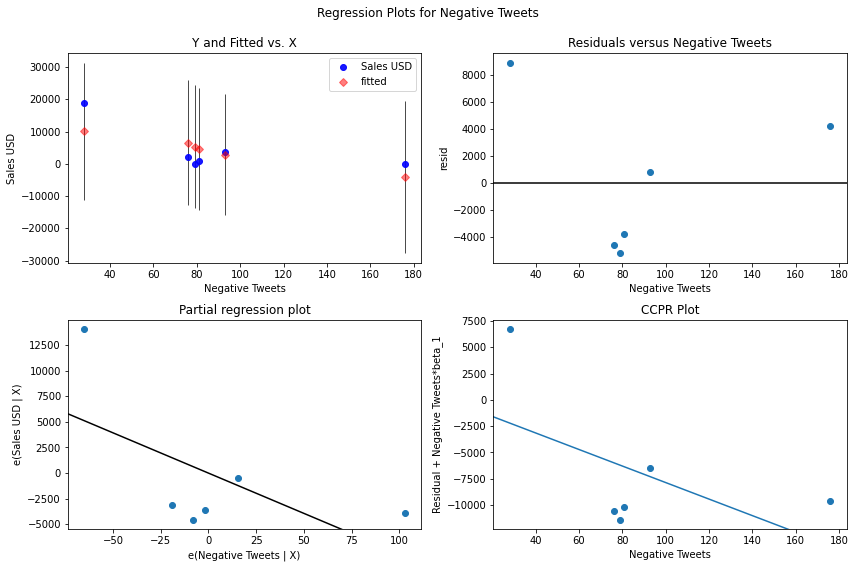

In [156]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(res, 'Negative Tweets', fig=fig)

#### We can see a decreasing linear relationship between negative tweets and sales 

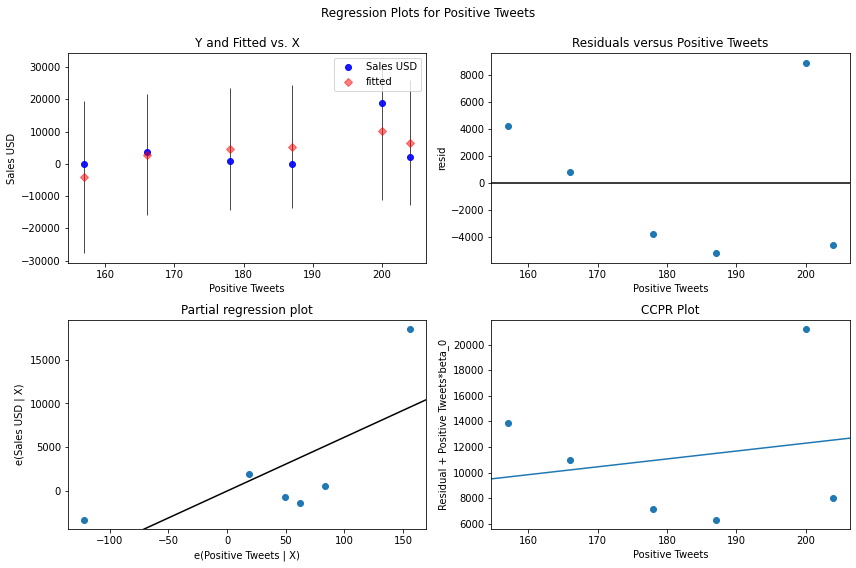

In [157]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(res, 'Positive Tweets', fig=fig)

#### We can see a increasing linear relationship between positive tweets and sales

### Model evaluation for test data

In [158]:

X = df_summary_test[['Positive Tweets','Negative Tweets']]
Y = df_summary_test['Sales USD']
X.head(10)

,Positive Tweets,Negative Tweets
0,208,92
1,49,13
2,175,131


In [159]:
Y

0     5100.0
1    10360.0
2    10880.0
Name: Sales USD, dtype: float64

In [160]:
pred_val = res.predict(X)
error_y = pred_val - Y

In [161]:
pred_val

0    5561.374181
1    1991.523962
2     468.306809
dtype: float64

In [162]:
Y

0     5100.0
1    10360.0
2    10880.0
Name: Sales USD, dtype: float64

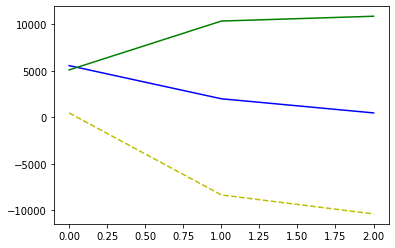

In [163]:
plt.plot(pred_val, c='b', label='PREDICTED')
plt.plot(Y, c='g', label='ACTUAL')
plt.plot(error_y, 'y--', label='ERROR')
plt.show()

#### From the above results and plot for the prediction of sales for test data, we can see that the error is very less for the sales of Car seat cover but significantly high for car shampoo and vacuum cleaner.

#### There is a high difference due to number of parameters like the pre and post pandemic dip in sales and other internal parameters in the data like skew and kurtosis 